In [2]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import scanpy as sc

plt.rcParams['image.cmap'] = 'Pastel1'
sns.set_style("white")
figsize=(8,4)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150, color_map='OrRd', transparent=True,ipython_format="png2x")
sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.10.6 pynndescent==0.5.7


In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import scanpy as sc

plt.rcParams['image.cmap'] = 'Pastel1'
sns.set_style("white")
figsize=(8,4)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150, color_map='OrRd', transparent=True,ipython_format="png2x")
sc.logging.print_header()

/home/jovyan/my-conda-envs/standard_py39/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/standard_py39/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/standard_py39/lib/python3.9/site-

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.2 scikit-learn==1.2.2 statsmodels==0.14.0 pynndescent==0.5.10


/home/jovyan/my-conda-envs/standard_py39/lib/python3.9/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [167]:
df = pd.read_csv("/mnt/01_Translation_relevant/bulk_objects/GSE111889_bulk_sample.txt", sep=" ")

In [168]:
df["mean"] = df.mean(axis=1)

/tmp/ipykernel_6140/4289721515.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["mean"] = df.mean(axis=1)


In [169]:
df.shape

(249, 55770)

In [170]:
df.iloc[:,-5:]

,disease,location,tissue,sample_ID,mean
1,CD,Sigmoid Colon,colon,CSM5FZ1G,654.116345
2,CD,Ileum,intestinal,CSM5FZ1F,701.200753
3,CD,Rectum,rectum,CSM5FZ1I,661.715252
4,CD,Sigmoid Colon,colon,CSM5FZ1H,703.686542
5,UC,Ileum,intestinal,CSM5FZ1J,720.410867
...,...,...,...,...,...
245,CD,Rectum,rectum,PSM7J4EU,739.764028
246,UC,Ileum,intestinal,PSM7J4EX,690.578876
247,UC,Rectum,rectum,PSM7J4EW,857.388846
248,CD,Ileum,intestinal,PSM7J4F4,730.491599


In [171]:
adata = sc.AnnData(df.iloc[:,:55765])
adata.obs = df.iloc[:,-5:]
adata.obs_names = adata.obs["sample_ID"]

/tmp/ipykernel_6140/2560044733.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(df.iloc[:,:55765])
/home/ubuntu/miniconda3/envs/rasa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ubuntu/miniconda3/envs/rasa/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [172]:
adata.raw = adata.copy()

In [173]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [174]:
adata

AnnData object with n_obs × n_vars = 249 × 55765
    obs: 'disease', 'location', 'tissue', 'sample_ID', 'mean'
    uns: 'log1p'

### Explore MUC6 expression

In [175]:
adata.obs["disease"].value_counts()

CD         126
UC          73
Non-IBD     50
Name: disease, dtype: int64

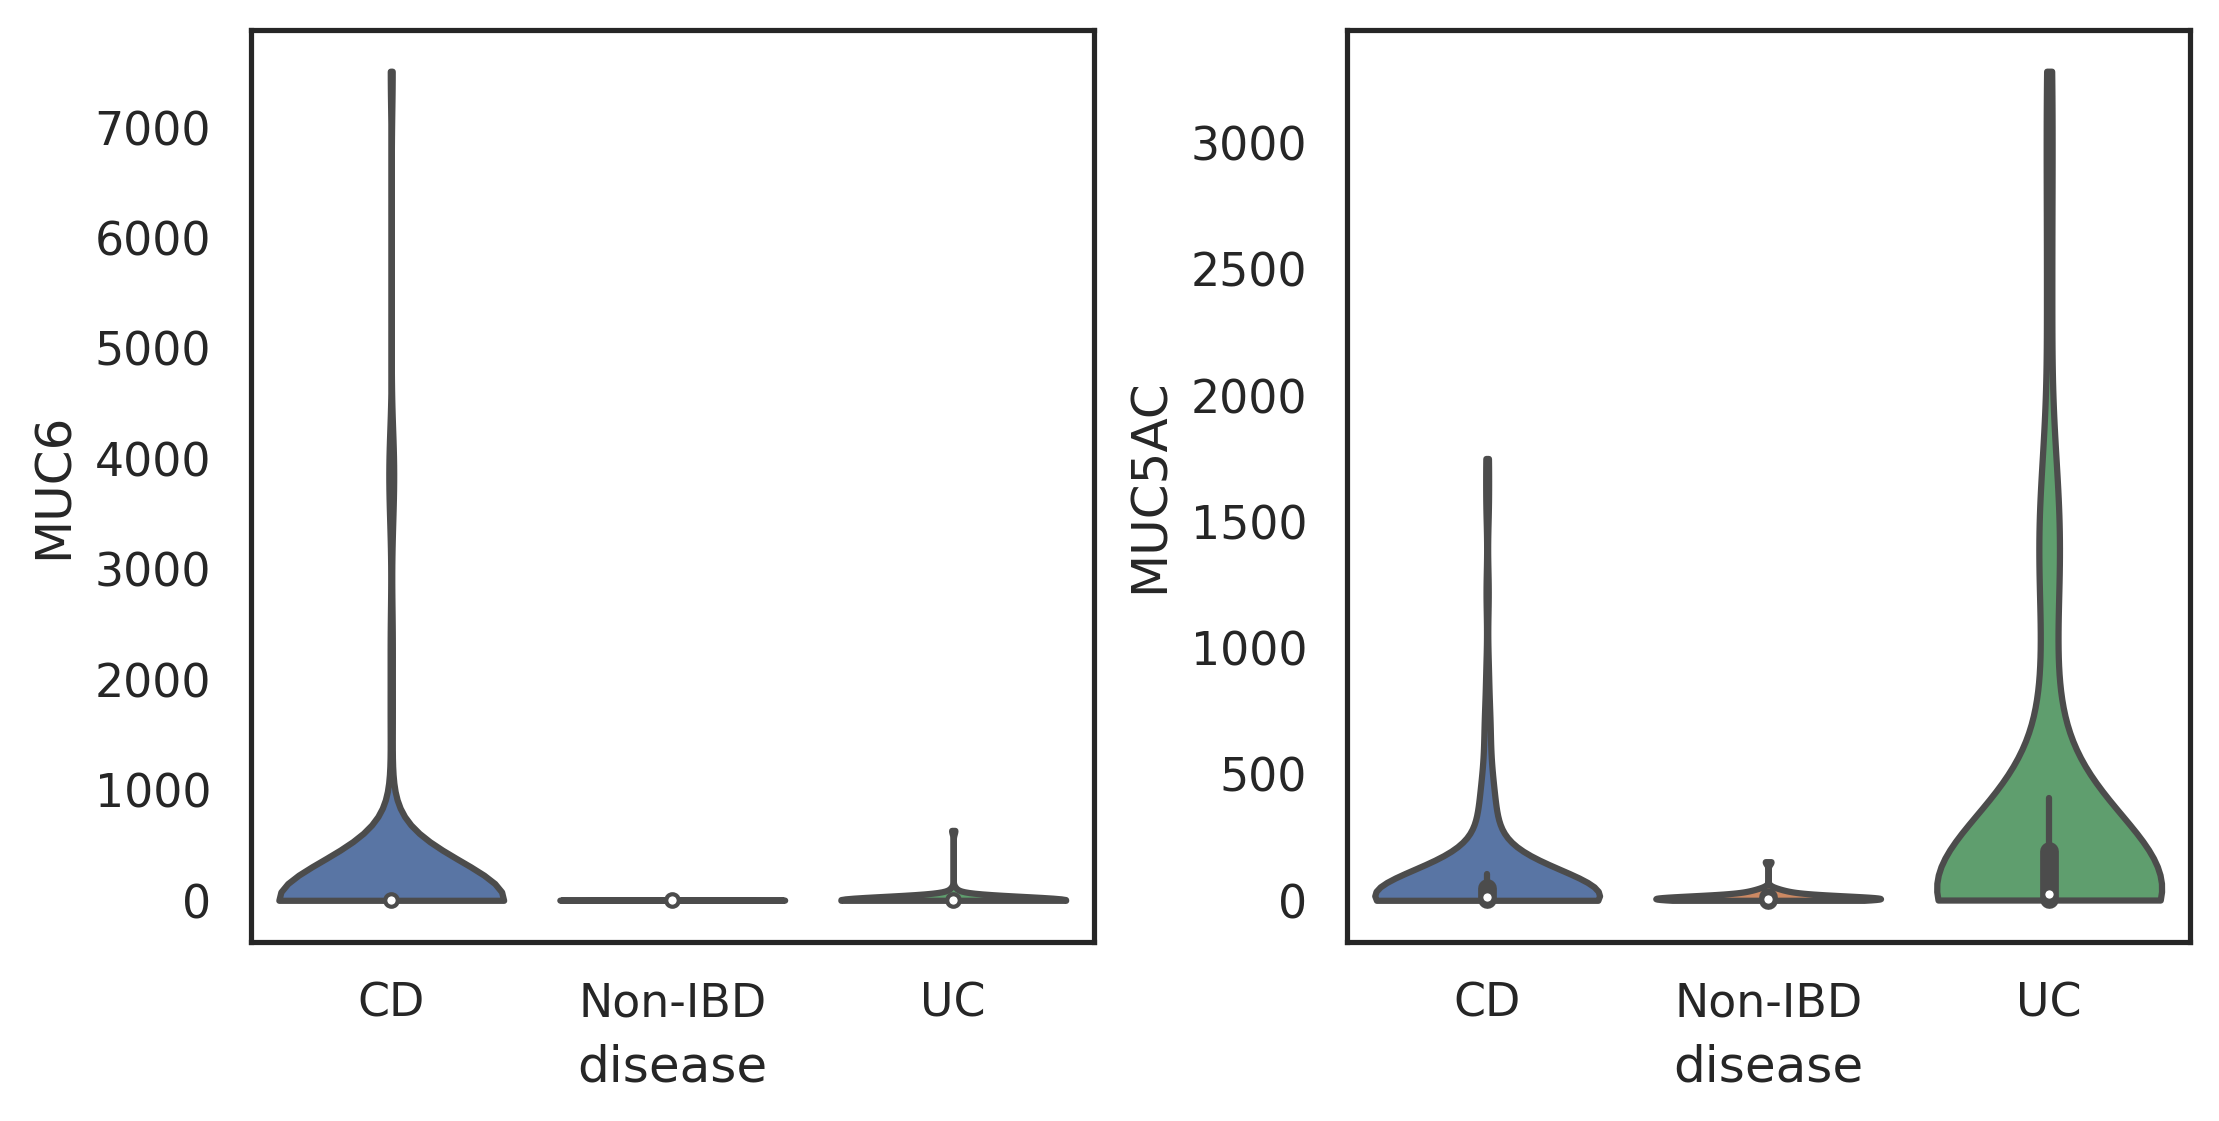

In [128]:
sc.pl.violin(adata, ['MUC6', 'MUC5AC'], groupby='disease', stripplot=False, inner='box') 

In [176]:
new = pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names)
new["disease"] = list(df["disease"])
new["location"] = list(df["location"])
new["tissue"] = list(df["tissue"])
new["sample_ID"] = list(df["sample_ID"])

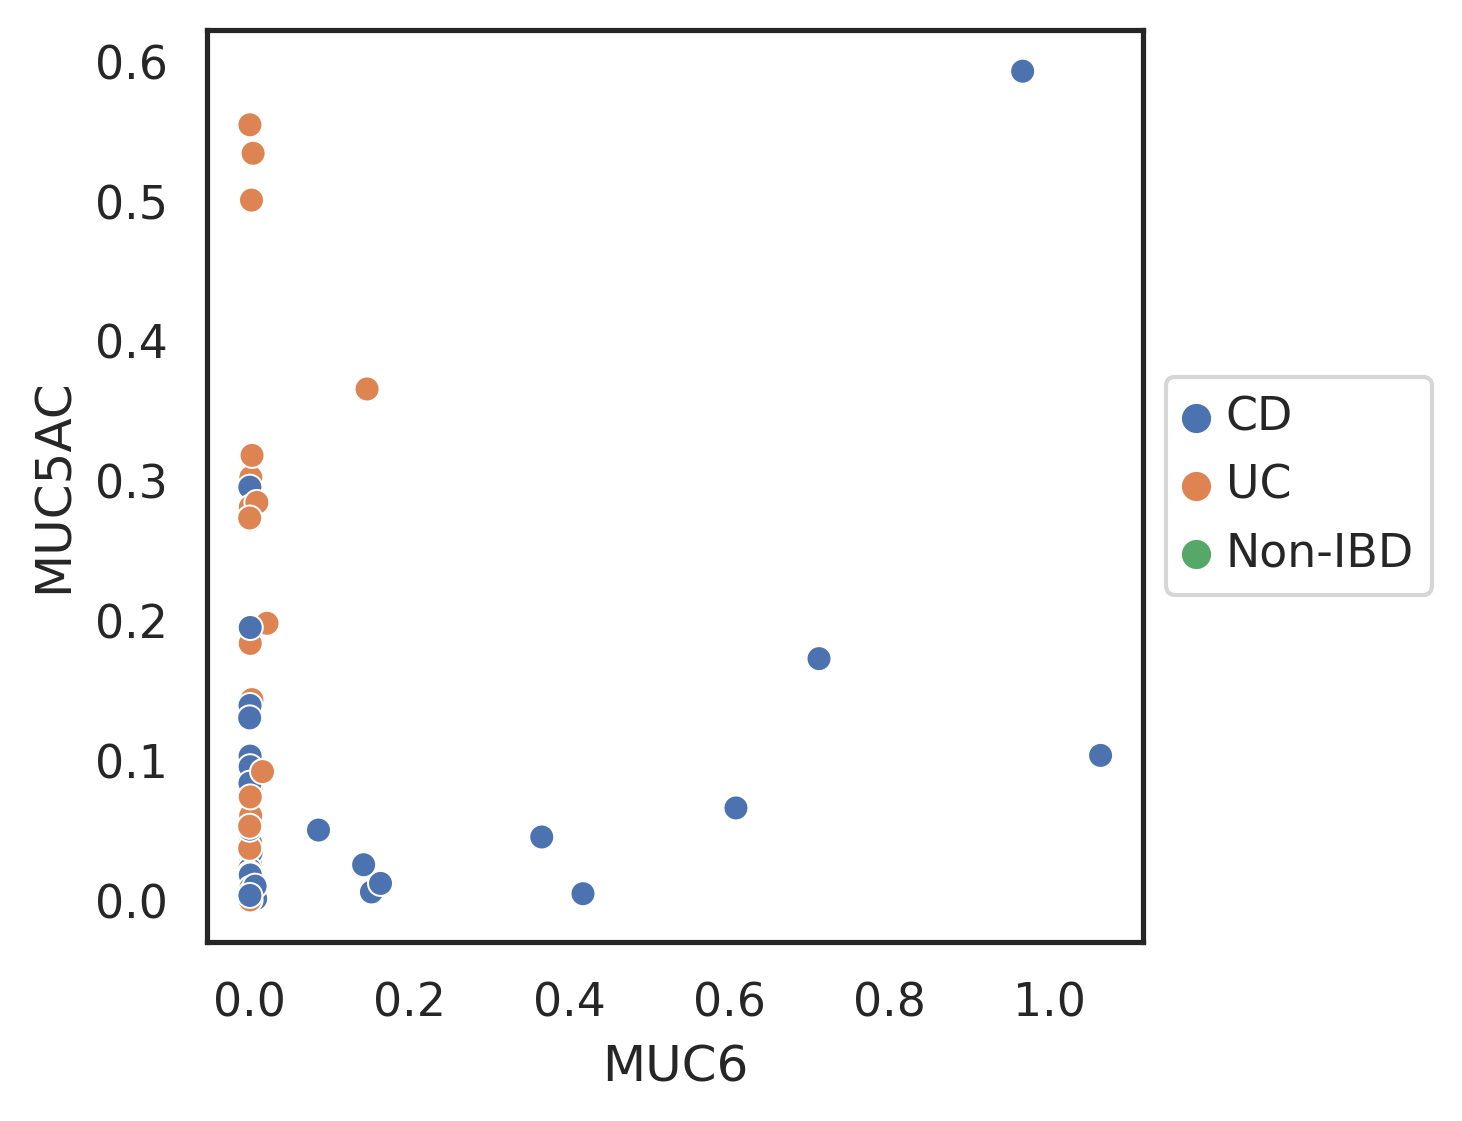

In [130]:
g = sns.scatterplot(data=new, x="MUC6", y="MUC5AC", hue="disease")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

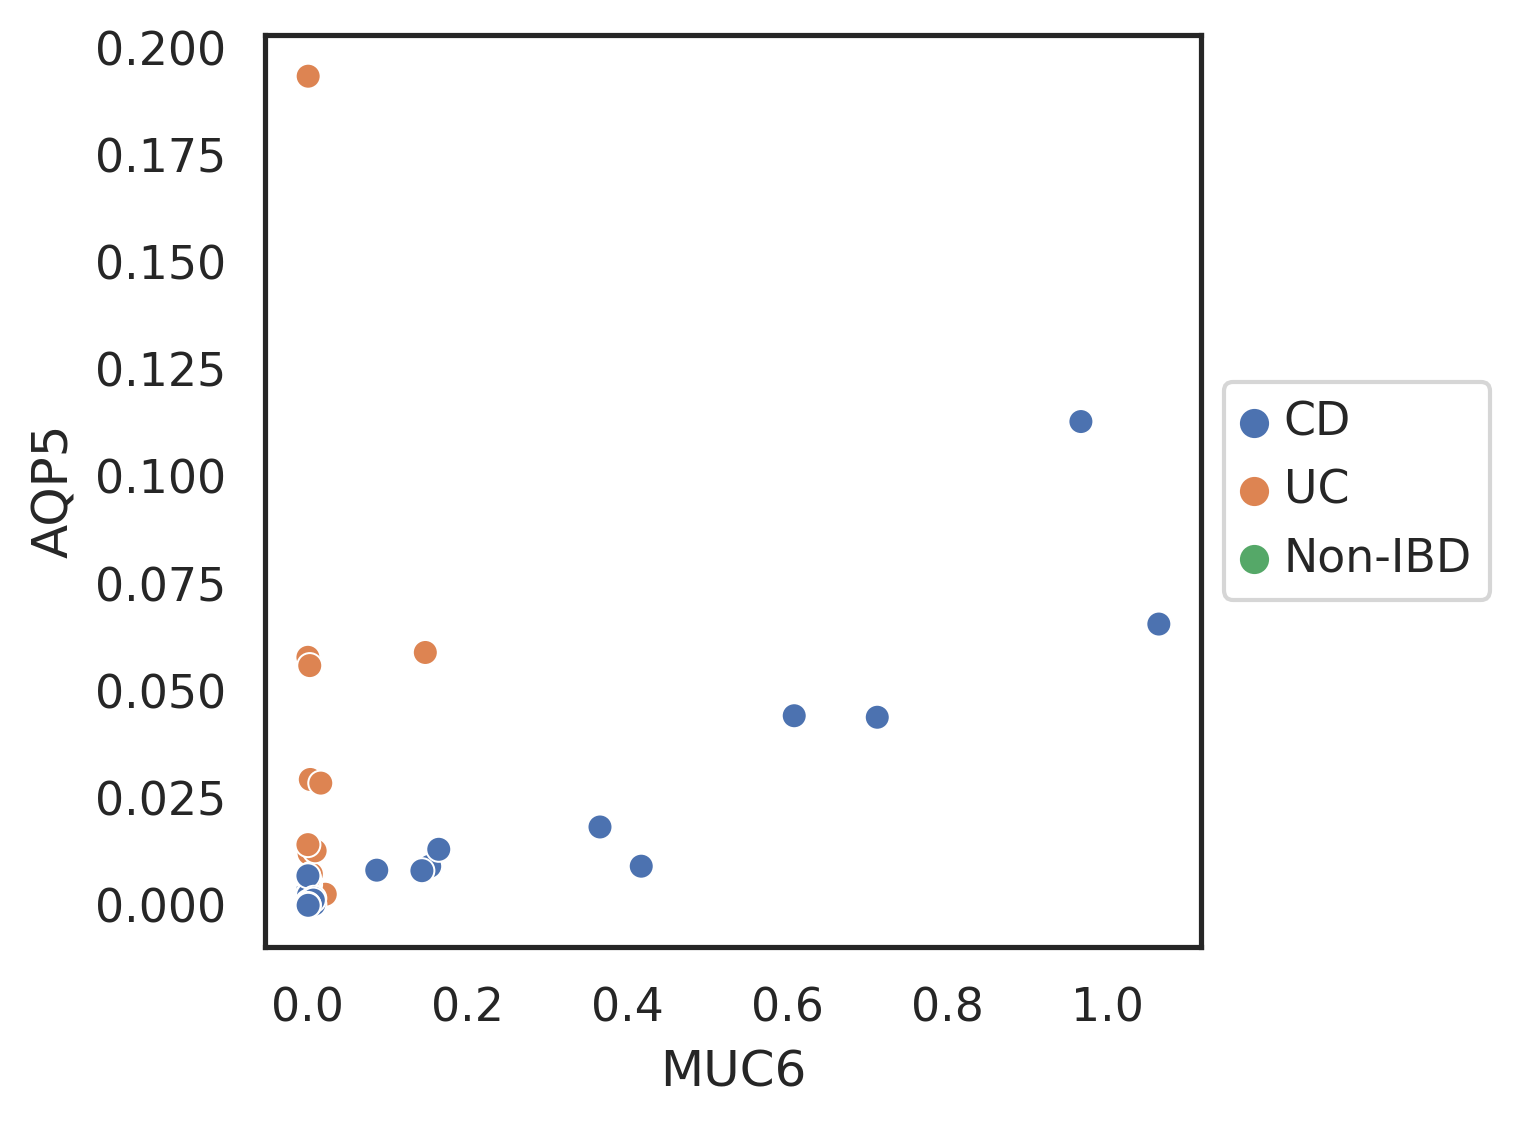

In [131]:
g = sns.scatterplot(data=new, x="MUC6", y="AQP5", hue="disease")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [132]:
new["comb"] = new["disease"].astype(str) + new["tissue"].astype(str) 

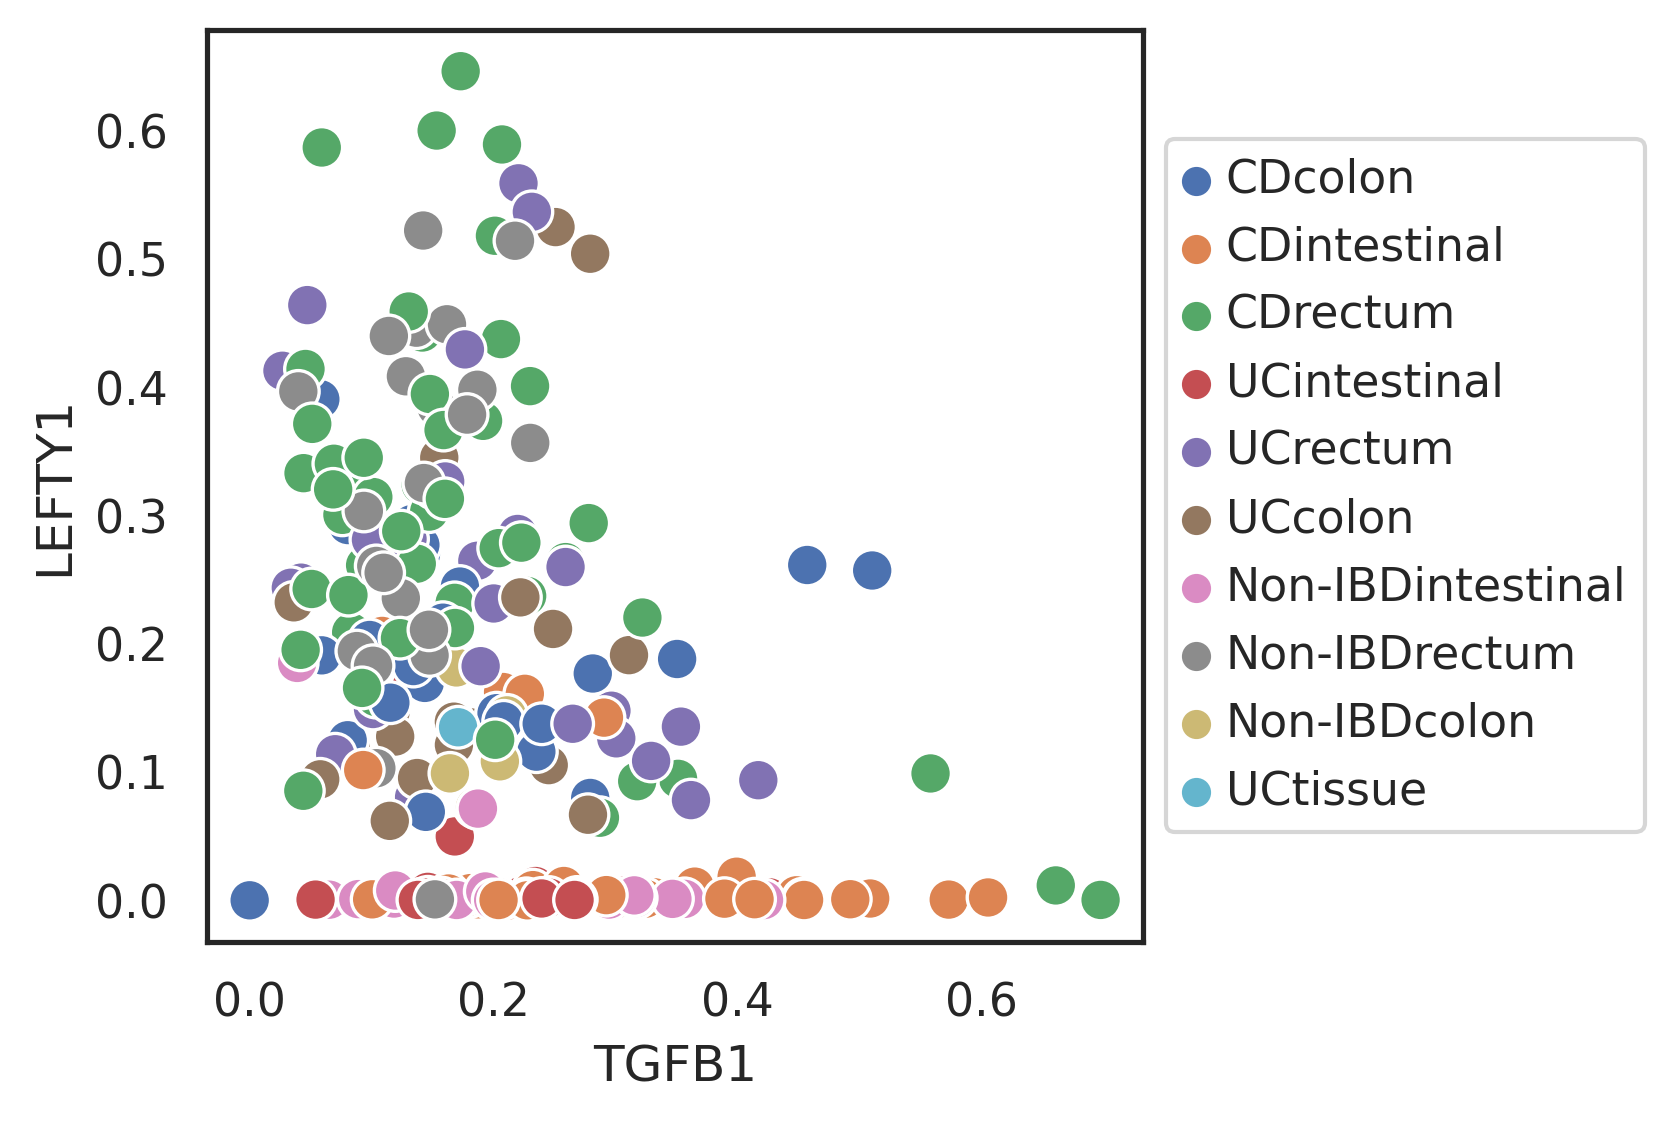

In [133]:
g = sns.scatterplot(data=new, x="TGFB1", y="LEFTY1", hue="comb", s=100)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

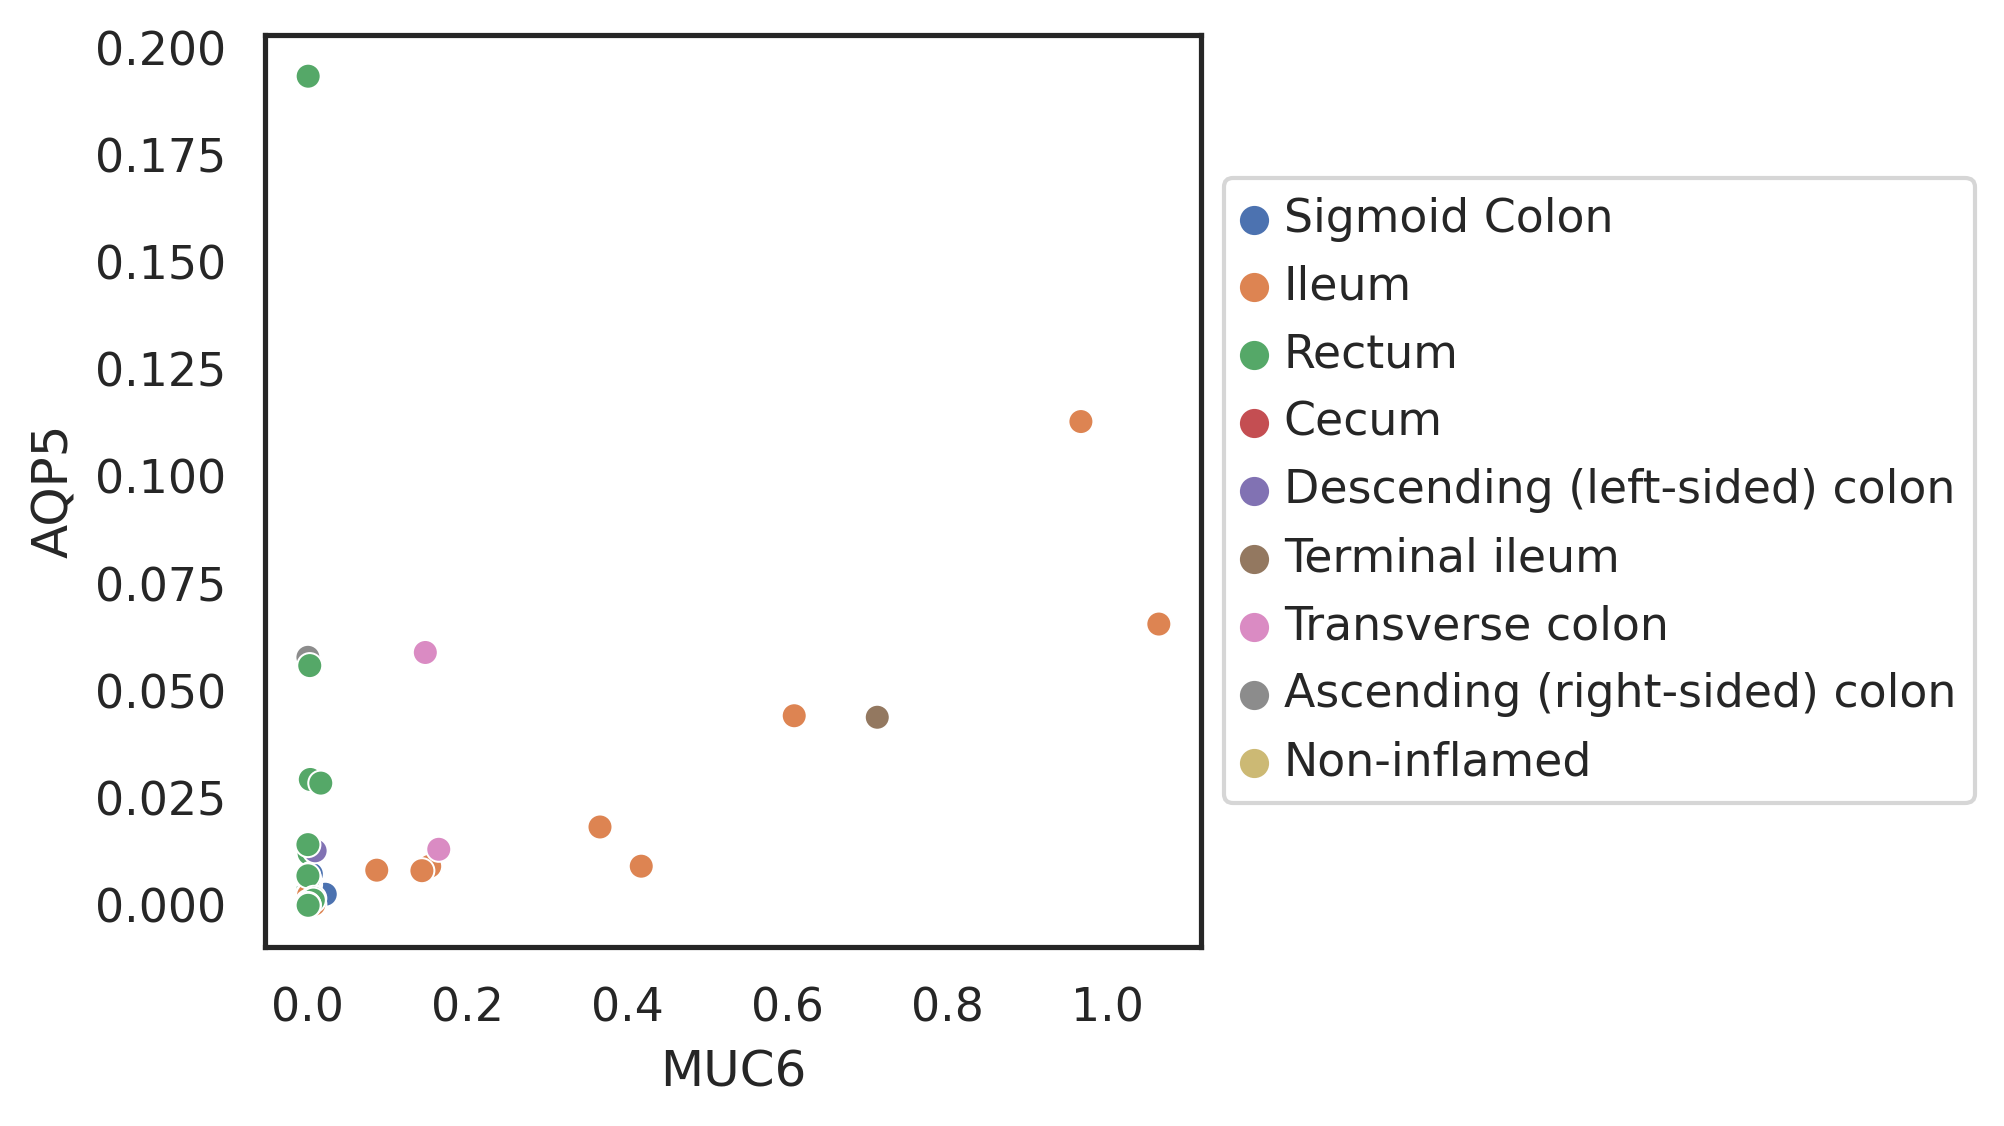

In [134]:
g = sns.scatterplot(data=new, x="MUC6", y="AQP5", hue="location")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

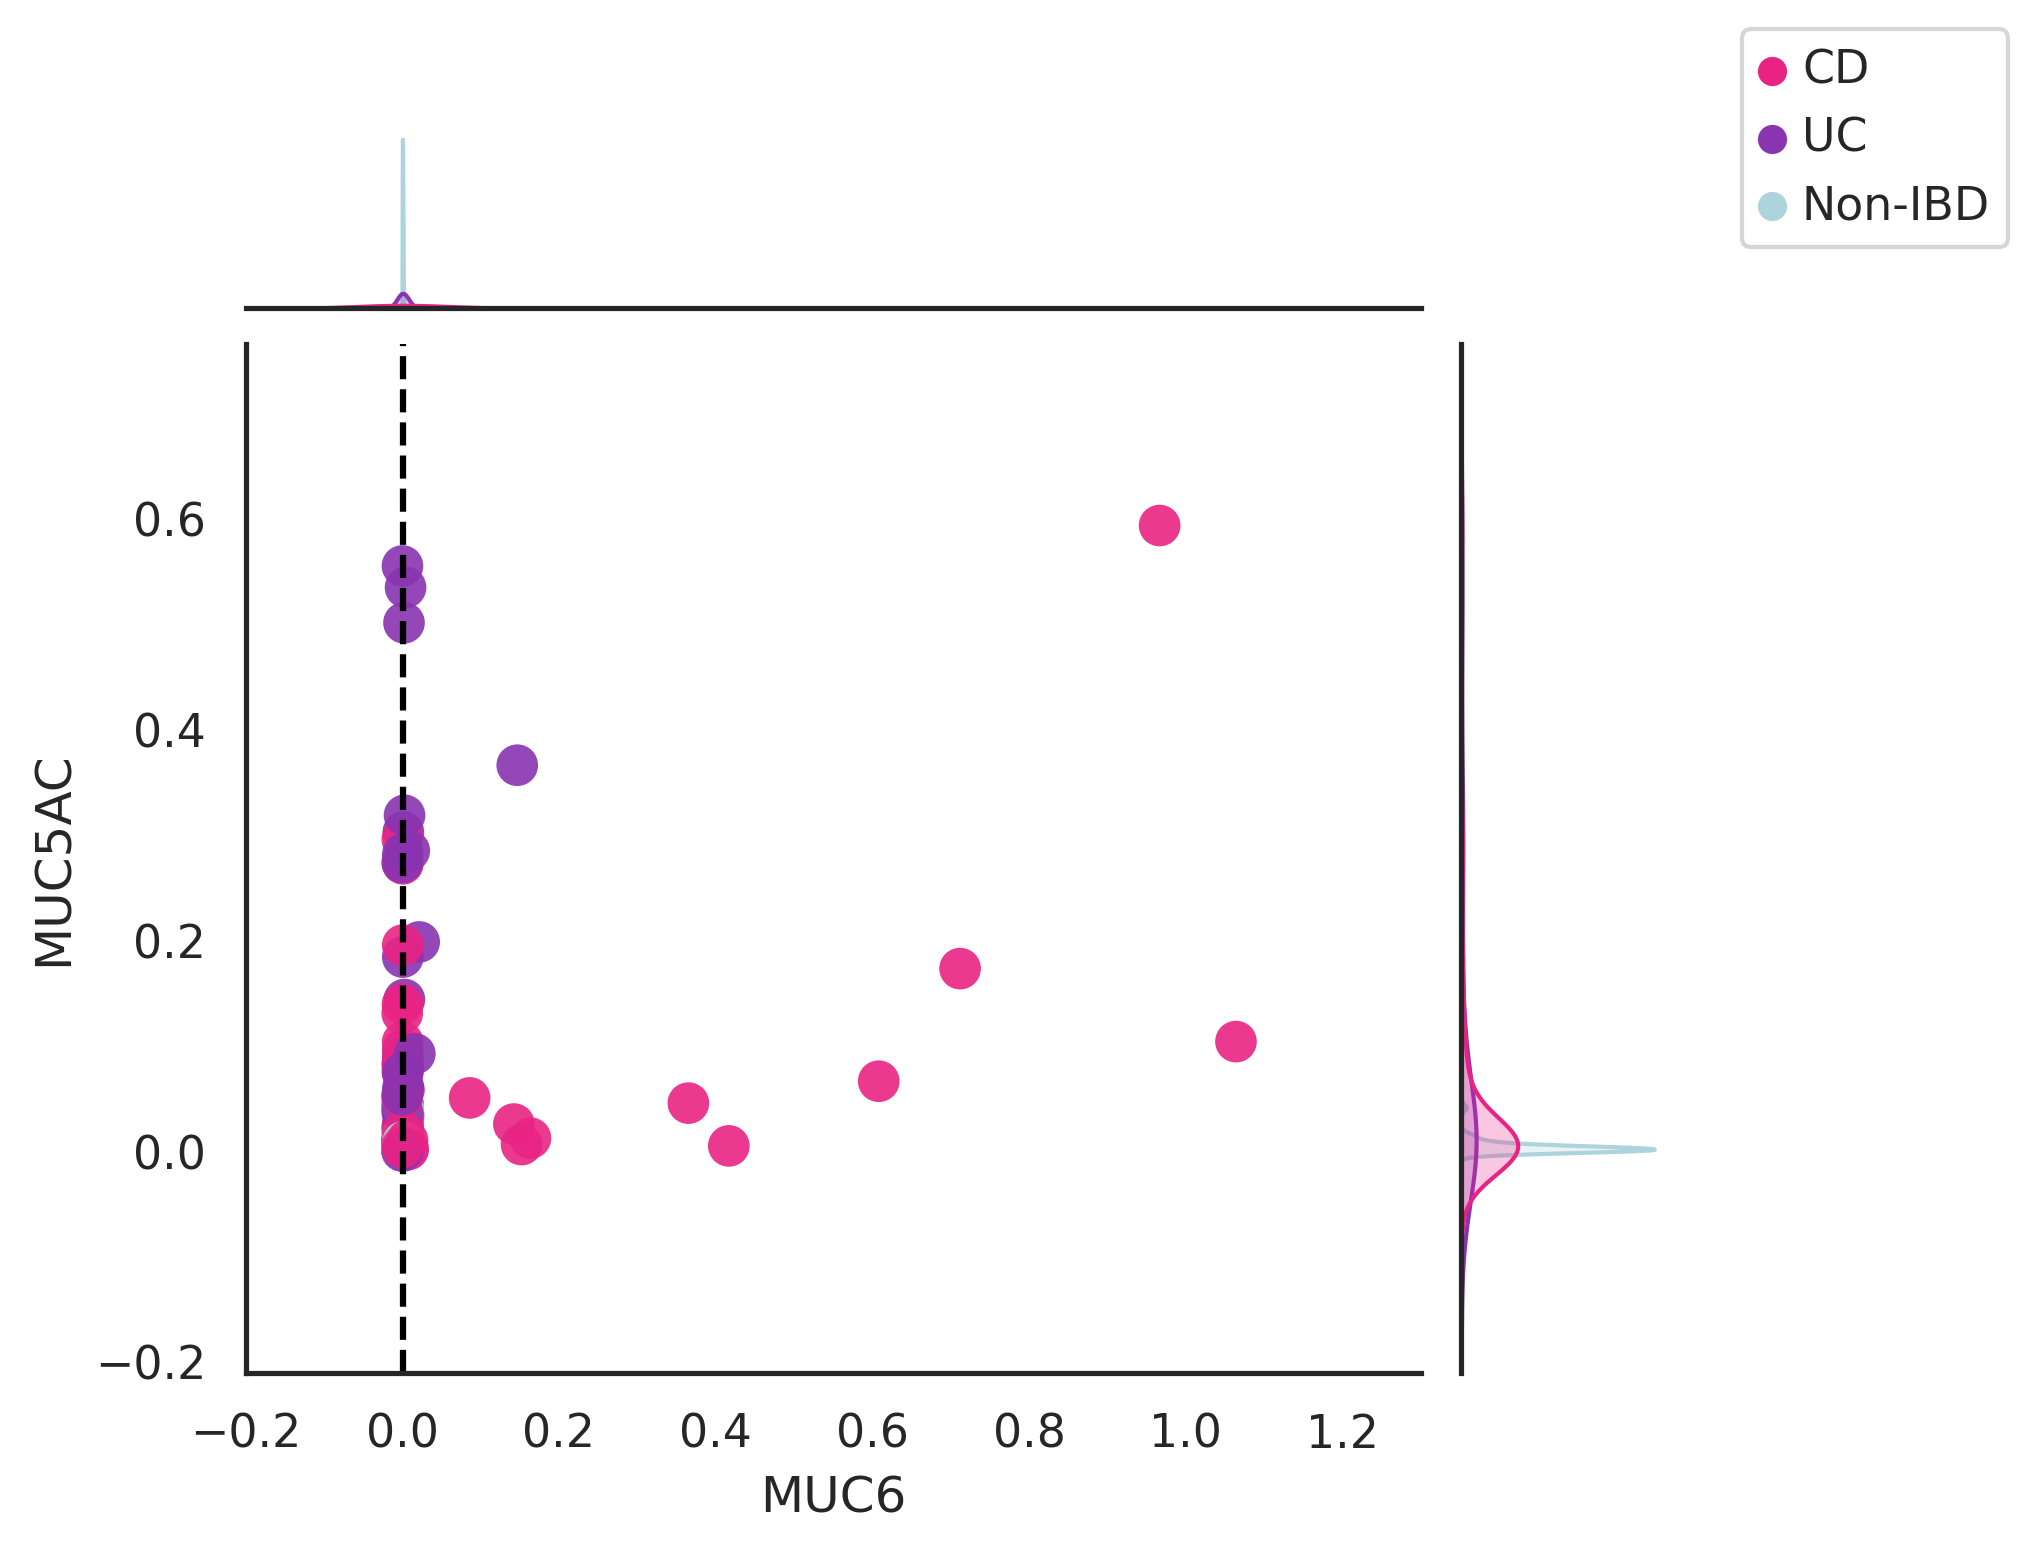

In [87]:
sns.set_style("white")
figsize=(3,3)

g = sns.jointplot(data=new, x="MUC6", y="MUC5AC", hue="disease", 
                    palette=['#e92384', '#8934B1','#ADD3DD'], s=100, alpha=0.9,linewidth=0, height=5)
g.ax_marg_x.set_xlim(-0.2, 1.3)
plt.subplots_adjust(right=1.1)
g.ax_joint.legend(bbox_to_anchor=(1.5,1.2), loc='center right', borderaxespad=0)
g.ax_joint.axvline(x= 0.001376,linestyle='--',color="black")
#g.savefig("/mnt/nfs/re5/GSE111889_bulk.pdf") 
#abc.ax_joint.set_xscale('log')
#abc.ax_joint.set_yscale('log')


In [88]:
new.tissue = new.tissue.replace('tissue','non-inflamed' )

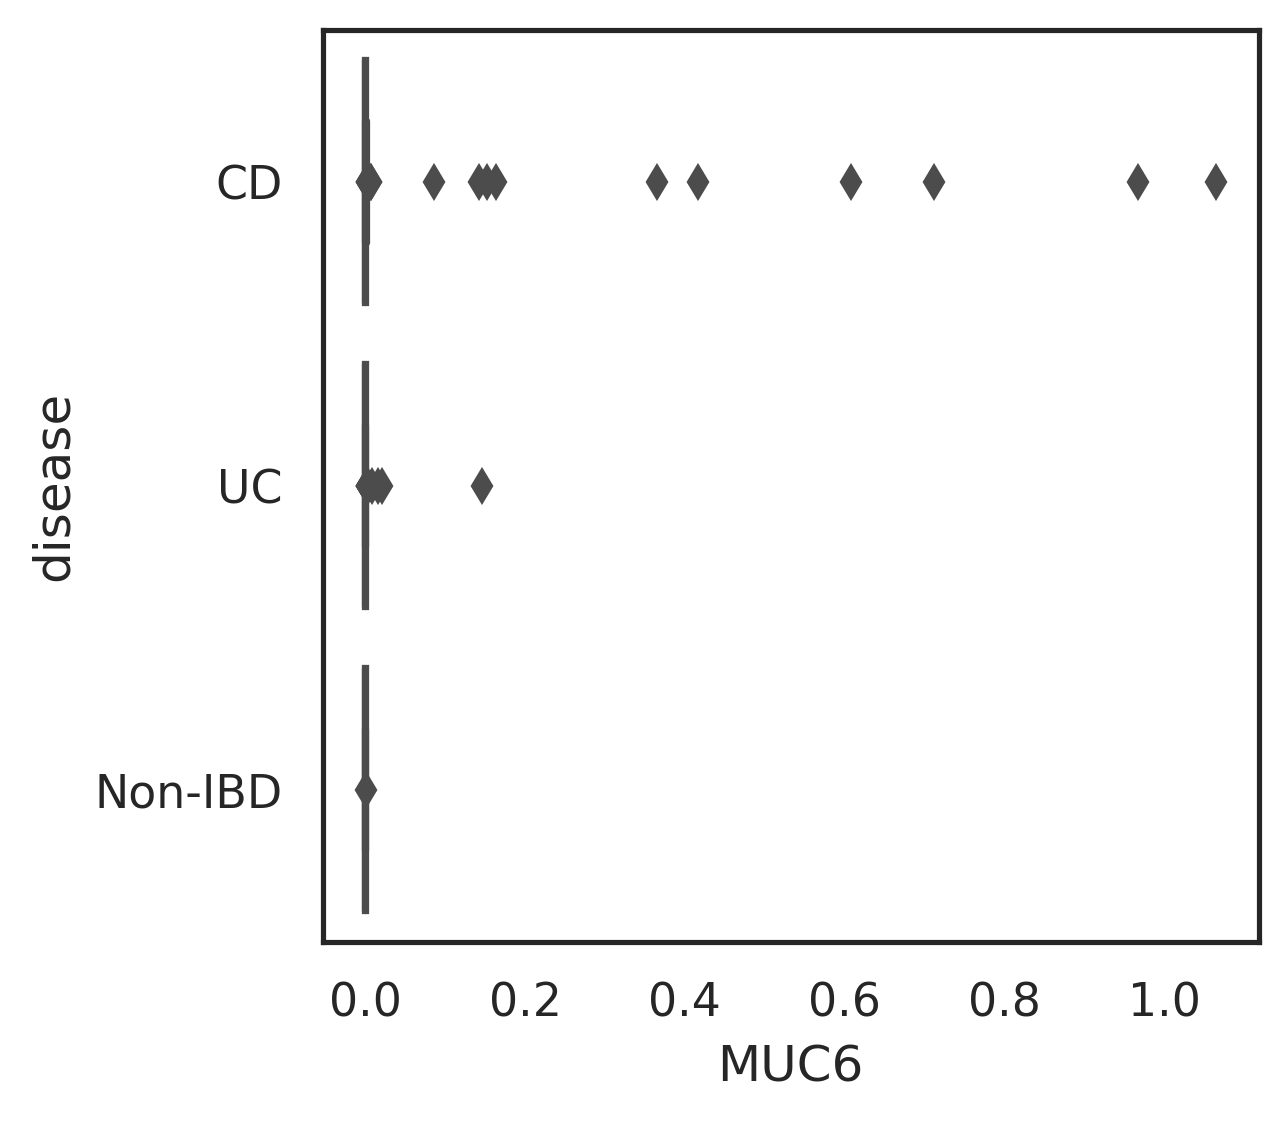

In [89]:
abc = sns.boxplot(data=new, x="MUC6", y="disease" )

### Add extended metadata

In [178]:
dis_metadata = pd.read_csv("/mnt/01_Translation_relevant/bulk_objects/GSE111889_full_hmp2_metadata.csv")
dis_metadata2 = dis_metadata[dis_metadata["External ID"].isin(list(adata.obs.sample_ID.unique()))]
dis_metadata2 = dis_metadata2[dis_metadata2["data_type"].isin(["host_transcriptomics"])]

/tmp/ipykernel_6140/2261796632.py:1: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  dis_metadata = pd.read_csv("/mnt/01_Translation_relevant/bulk_objects/GSE111889_full_hmp2_metadata.csv")


In [180]:
adata.obs

,disease,location,tissue,sample_ID,mean
sample_ID,,,,,
CSM5FZ1G,CD,Sigmoid Colon,colon,CSM5FZ1G,654.116345
CSM5FZ1F,CD,Ileum,intestinal,CSM5FZ1F,701.200753
CSM5FZ1I,CD,Rectum,rectum,CSM5FZ1I,661.715252
CSM5FZ1H,CD,Sigmoid Colon,colon,CSM5FZ1H,703.686542
CSM5FZ1J,UC,Ileum,intestinal,CSM5FZ1J,720.410867
...,...,...,...,...,...
PSM7J4EU,CD,Rectum,rectum,PSM7J4EU,739.764028
PSM7J4EX,UC,Ileum,intestinal,PSM7J4EX,690.578876
PSM7J4EW,UC,Rectum,rectum,PSM7J4EW,857.388846


In [181]:
dis_metadata2

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
270,C3002CSC1_TX,CSM5FZ1G,C3002,C3002CSC1,host_transcriptomics,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
271,C3002CSC2_TX,CSM5FZ1F,C3002,C3002CSC2,host_transcriptomics,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
272,C3002CSC3_TX,CSM5FZ1I,C3002,C3002CSC3,host_transcriptomics,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
273,C3002CSC4_TX,CSM5FZ1H,C3002,C3002CSC4,host_transcriptomics,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
274,C3003CSC1_TX,CSM5FZ1J,C3003,C3003CSC1,host_transcriptomics,1.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,P6024CSC2_TX,PSM7J4EU,P6024,P6024CSC2,host_transcriptomics,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
518,P6025CSC1_TX,PSM7J4EX,P6025,P6025CSC1,host_transcriptomics,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
519,P6025CSC2_TX,PSM7J4EW,P6025,P6025CSC2,host_transcriptomics,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
520,P6028CSC1_TX,PSM7J4F4,P6028,P6028CSC1,host_transcriptomics,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [182]:
dis_metadata2 = dis_metadata2.loc[:,[
                       "Aphthous ulcers", "Pyoderma gangrenosum", 
                        "Anal fissure", "New fistula", "Abscess","Abdominal pain", 'Hispanic or Latino Origin',"Cancer - colon or rectum","Celiac sprue", "is_inflamed", "CRP (mg/L)", "Location",
                       'What is the endoscopic grading of severity?', "baseline_montreal_location",
                 
              "Ileum","Right Colon","Transverse Colon","Left Colon","Rectum","Total",
                    "Ileum.1","Right Colon.1","Transverse Colon.1","Left Colon.1","Rectum.1","Total.1",
                  "Ileum.2","Right Colon.2","Transverse Colon.2","Left Colon.2","Rectum.2","Total.2",
                "SES-CD Score","Partial Endoscopy.1","sex", "biopsy_location", "External ID", "Participant ID","Age at diagnosis", ]]

In [183]:
adata.obs.rename(columns={'sample_ID':'External ID'}, inplace=True)

In [184]:
adata.obs.head(2)

,disease,location,tissue,External ID,mean
sample_ID,,,,,
CSM5FZ1G,CD,Sigmoid Colon,colon,CSM5FZ1G,654.116345
CSM5FZ1F,CD,Ileum,intestinal,CSM5FZ1F,701.200753


In [185]:
df = pd.merge(adata.obs, dis_metadata2, on='External ID', )

In [186]:
df.index = df["External ID"]

In [189]:
df.head(2)

,disease,location,tissue,External ID,mean,Aphthous ulcers,Pyoderma gangrenosum,Anal fissure,New fistula,Abscess,...,Transverse Colon.2,Left Colon.2,Rectum.2,Total.2,SES-CD Score,Partial Endoscopy.1,sex,biopsy_location,Participant ID,Age at diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5FZ1G,CD,Sigmoid Colon,colon,CSM5FZ1G,654.116345,No,No,No,No,No,...,Unaffected segment,Unaffected segment,Unaffected segment,0.0,0.0,No,Female,Sigmoid Colon,C3002,47.0
CSM5FZ1F,CD,Ileum,intestinal,CSM5FZ1F,701.200753,No,No,No,No,No,...,Unaffected segment,Unaffected segment,Unaffected segment,0.0,0.0,No,Female,Ileum,C3002,47.0


In [190]:
adata.obs = df

In [36]:
adata.write("/mnt/GSE111889_bulk_IBD.h5ad")

In [192]:
new = pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names)
new["disease"] = list(df["disease"])
new["location"] = list(df["location"])
new["tissue"] = list(df["tissue"])

In [193]:
new["Participant ID"] = list(adata.obs["Participant ID"])

In [194]:
new2 = new.drop_duplicates(subset=["Participant ID"])

In [195]:
new2["MUC6"].groupby(new2["disease"]).describe()
#you could take any value higher than 1-2 SDs from the mean expression in controls


,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
CD,43.0,0.077227,0.216232,0.0,0.000249,0.000550,0.001384,1.064092
Non-IBD,22.0,0.000490,0.000410,0.0,0.000195,0.000438,0.000879,0.001272
UC,25.0,0.000945,0.001751,0.0,0.000357,0.000521,0.000747,0.009018


In [196]:
0.000490 + 0.000410*2

0.00131

In [197]:
new2.loc[new2['MUC6'] > 0.00131, 'disease'] = new2["disease"]+'_MUC6_high'

In [198]:
new2

,X5S_rRNA,X7SK,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A2ML1.AS1,A2ML1.AS2,...,snoZ40,snoZ5,snoZ6,snosnR60_Z15,snosnR66,yR211F11.2,disease,location,tissue,Participant ID
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5FZ1G,0.000274,0.010093,0.000274,0.006013,0.476231,1.239998,0.003011,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,CD,Sigmoid Colon,colon,C3002
CSM5FZ1J,0.000000,0.025316,0.001492,0.007687,1.213817,2.147820,0.004471,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000249,UC,Ileum,intestinal,C3003
CSM5FZ1O,0.000000,0.016829,0.000000,0.027097,0.482509,2.886555,0.013750,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000223,UC,Sigmoid Colon,colon,C3004
CSM5FZ1Q,0.000249,0.044342,0.000747,0.013608,0.873513,1.953957,0.002985,0.000249,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,UC,Ileum,intestinal,C3005
CSM5FZ1W,0.000533,0.028368,0.000000,0.011128,0.798223,2.310632,0.003458,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,UC,Sigmoid Colon,colon,C3006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM6XC11,0.000714,0.085475,0.001427,0.028617,0.928529,1.685223,0.010180,0.000238,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,Non-IBD,Ileum,intestinal,P6017
PSM6XC13,0.000695,0.094930,0.001389,0.028537,1.105143,1.905180,0.012657,0.000463,0.000000,0.000232,...,0.0,0.000000,0.0,0.0,0.0,0.000000,Non-IBD,Ileum,intestinal,P6018
PSM7J4EV,0.000000,0.042225,0.000227,0.016882,0.805807,2.606658,0.006110,0.000000,0.000227,0.000000,...,0.0,0.000681,0.0,0.0,0.0,0.000000,CD_MUC6_high,Ileum,intestinal,P6024


In [207]:
unique = new2.drop_duplicates(subset=['Participant ID'])

In [202]:
new2 = new2[new2["disease"].isin(['CD',  'CD_MUC6_high','Non-IBD_MUC6_high'])]

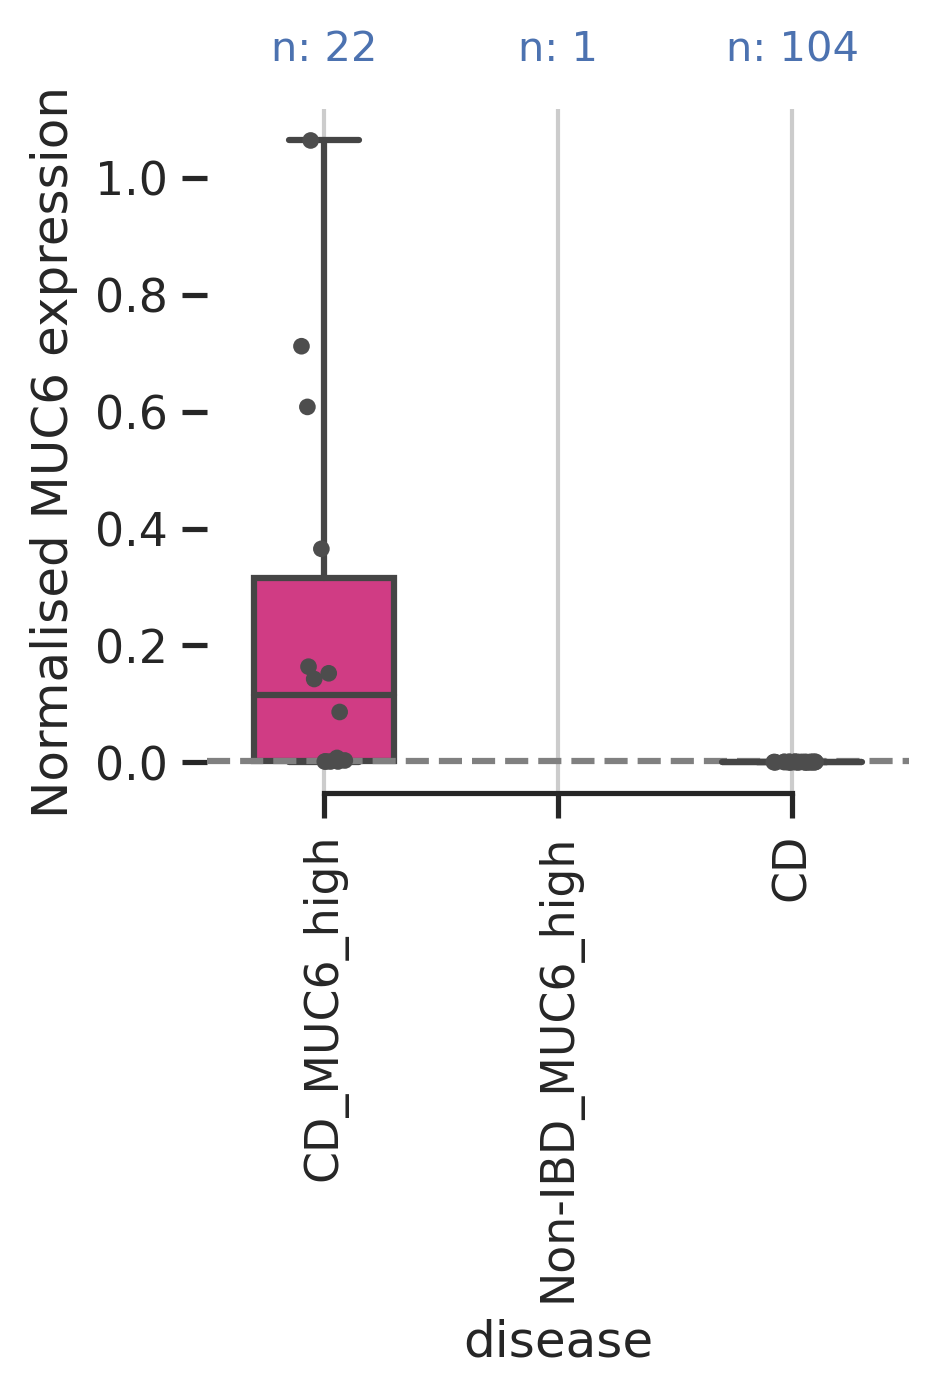

In [206]:
sns.set_theme(style="ticks") 
plt.figure(figsize=(3,3))
ax = sns.boxplot(x="disease", y="MUC6", data=new2, order =['CD_MUC6_high','Non-IBD_MUC6_high','CD'], 
                 whis=[0, 100], width=.6,  palette=['#e92384', '#8934B1','#ADD3DD', '#e92384', '#8934B1','#ADD3DD'])

# Add in points to show each observation
sns.stripplot(x="disease", y="MUC6", data=new2,order =['CD_MUC6_high','Non-IBD_MUC6_high','CD'],
              size=4, color=".3", linewidth=0)


# Calculate number of obs per group & median to position labels
medians = new.groupby(['disease'])['MUC6'].median().values
nobs = new['disease'].value_counts()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

nobs = [ 'n: 22', 'n: 1', 'n: 104']
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 1.2,
            nobs[tick],
            horizontalalignment='center',
            size='small',
            color='b',
            weight='regular')

ax.xaxis.grid(True)
plt.xticks(rotation=90)
ax.axhline(0.001376, color="grey", ls="--")
ax.set(ylabel="Normalised MUC6 expression")
sns.despine(trim=True, left=True)
plt.savefig("/mnt/nfs/re5/GSE111889_bulk.pdf", bbox_inches='tight') 
plt.show()

In [ ]:
#second dataset E_CEOD_101794

In [45]:
df_CEOD = pd.read_csv("/mnt/farm/rl20/Gut/E_CEOD_101794_all_gene_exp.csv", index_col="Unnamed: 0")

In [46]:
df_CEOD["sample_ID"] = df_CEOD.index

In [47]:
adata2 = sc.AnnData(df_CEOD.iloc[:,:38592])
adata2.obs = df_CEOD.iloc[:,-3:]
adata2.obs_names = adata2.obs["sample_ID"]
adata2.raw = adata2.copy()
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

normalizing counts per cell
    finished (0:00:00)


/tmp/ipykernel_6140/2139634452.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata2 = sc.AnnData(df_CEOD.iloc[:,:38592])


In [48]:
#adata2.write("/mnt/01_Translation_relevant/bulk_objects/E_CEOD_101794_bulk_IBD.h5ad")

In [49]:
df_CEOD["sample_type"][df_CEOD['MUC6'] >= 6].value_counts()

CD        180
normal     34
Name: sample_type, dtype: int64

In [50]:
df_CEOD["MUC6"].groupby(df_CEOD["sample_type"]).describe()

,count,mean,std,min,25%,50%,75%,max
sample_type,,,,,,,,
CD,254.0,384.759843,2555.846483,0.0,5.0,13.0,124.75,39823.0
normal,50.0,12.960000,29.397320,2.0,4.0,6.5,11.00,210.0


In [51]:
new2 = pd.DataFrame(adata2.X, index=adata2.obs_names, columns=adata2.var_names)
new2["disease"] = adata2.obs.sample_type
new2["location"] = adata2.obs.location
new2["sample_ID"] = adata2.obs.sample_ID

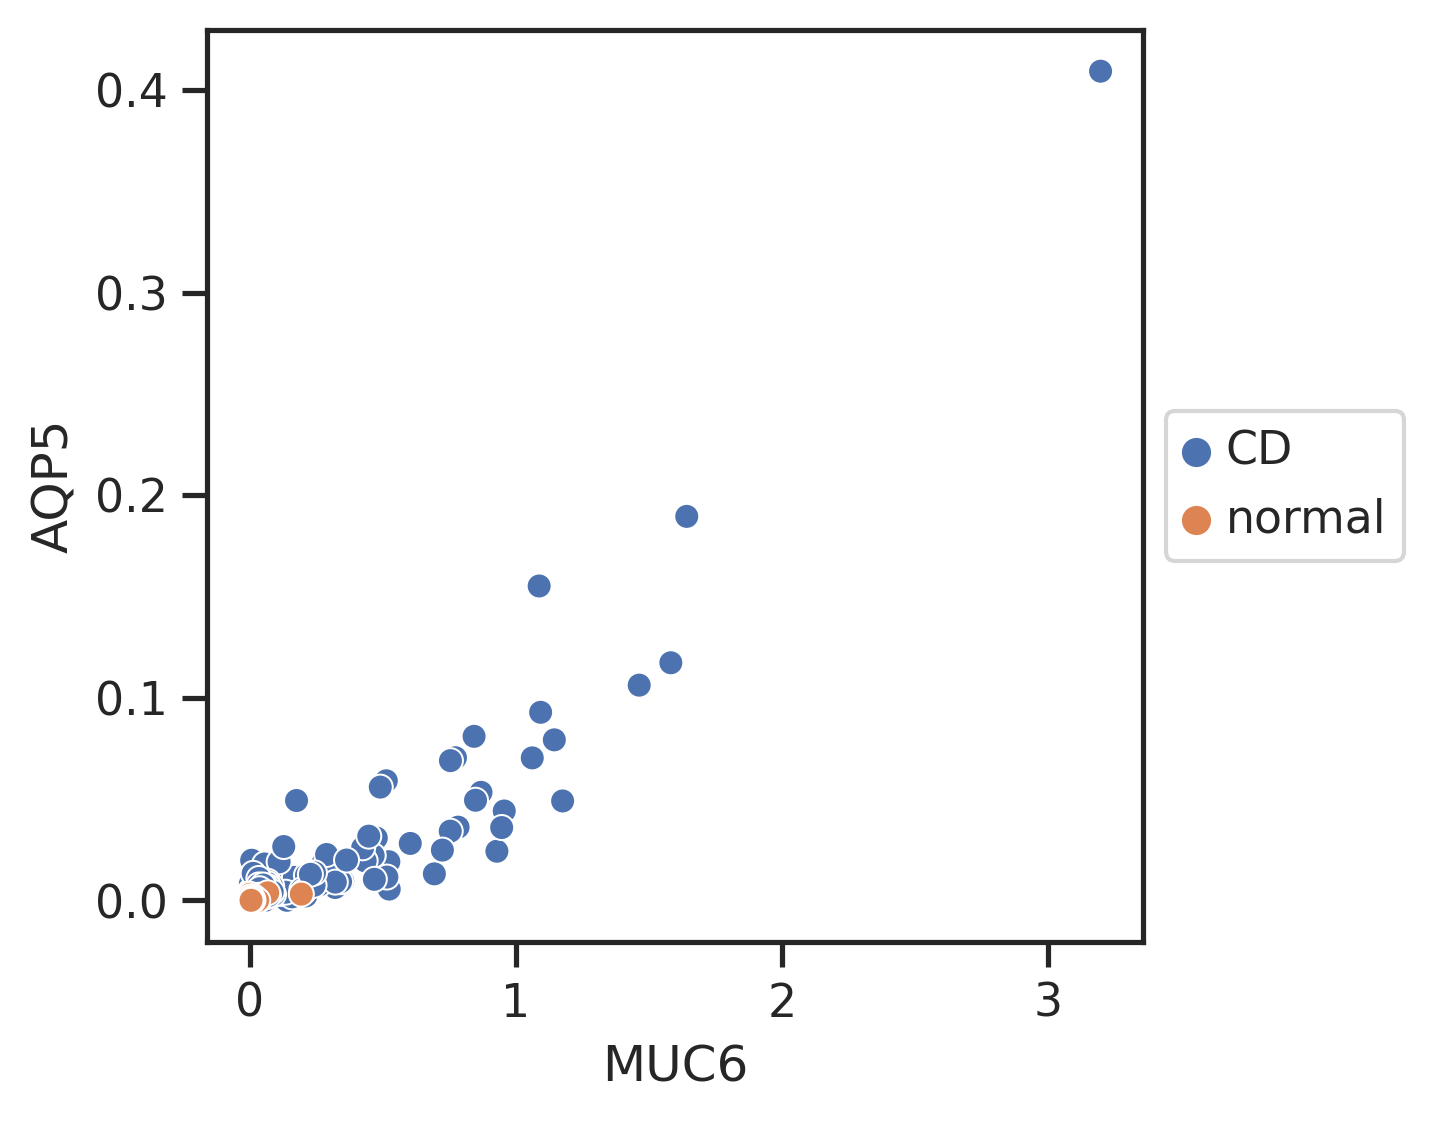

In [52]:
g = sns.scatterplot(data=new2, x="MUC6", y="AQP5", hue="disease")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

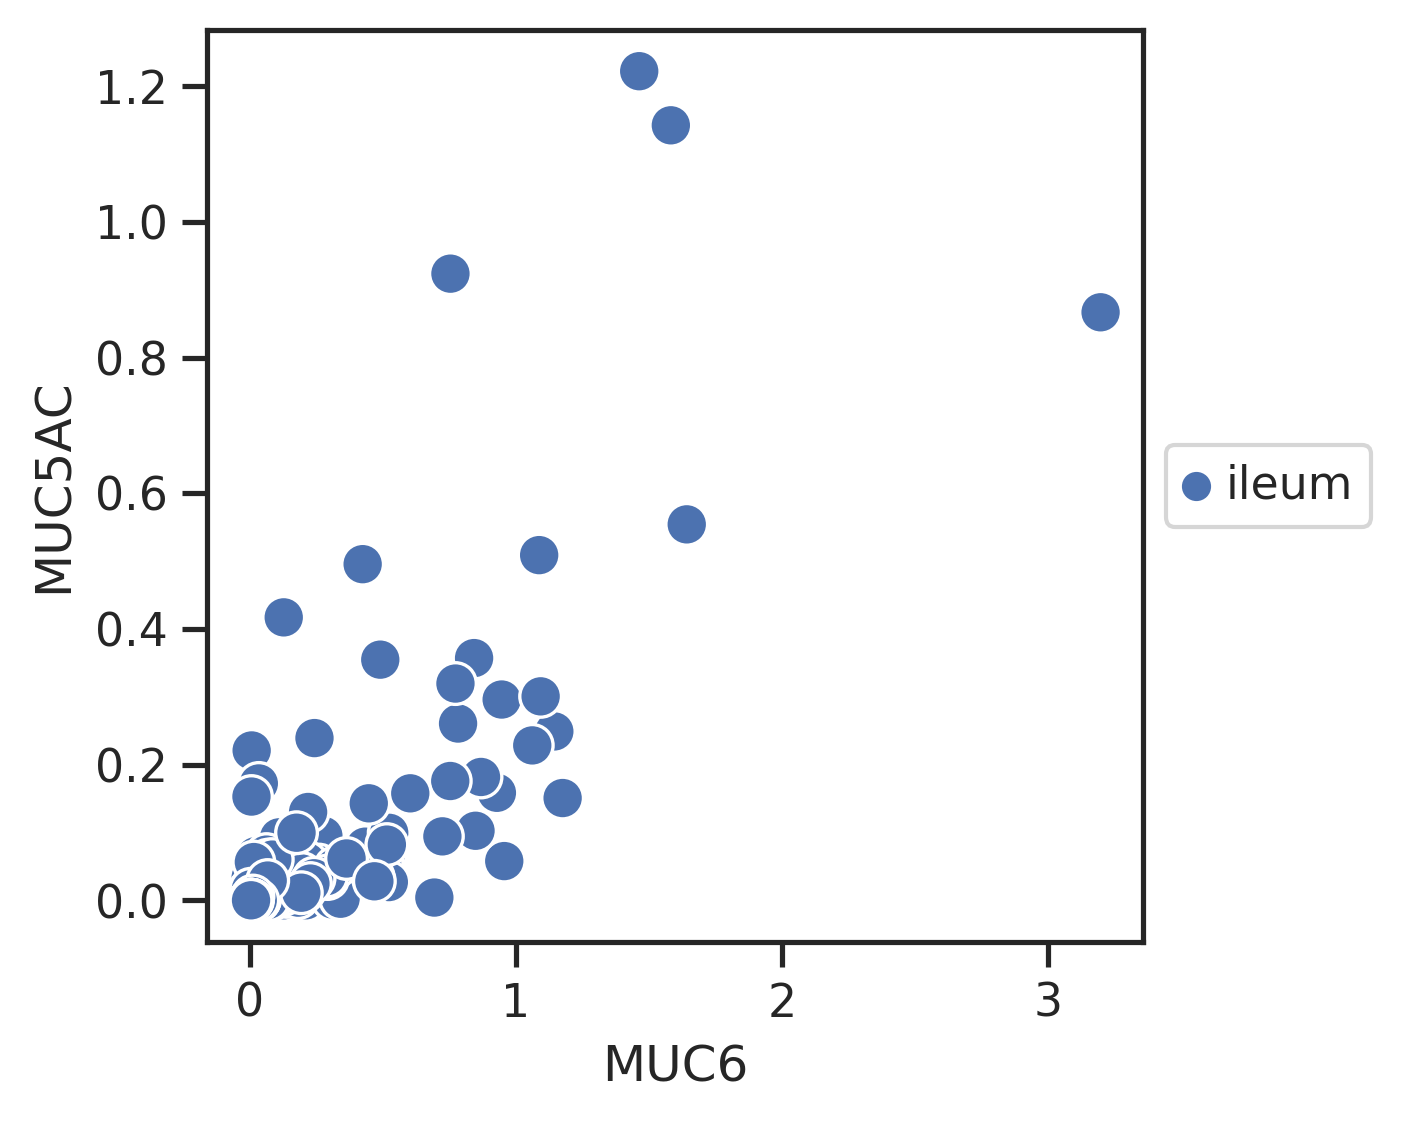

In [53]:
g = sns.scatterplot(data=new2, x="MUC6", y="MUC5AC", hue="location", s=100)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

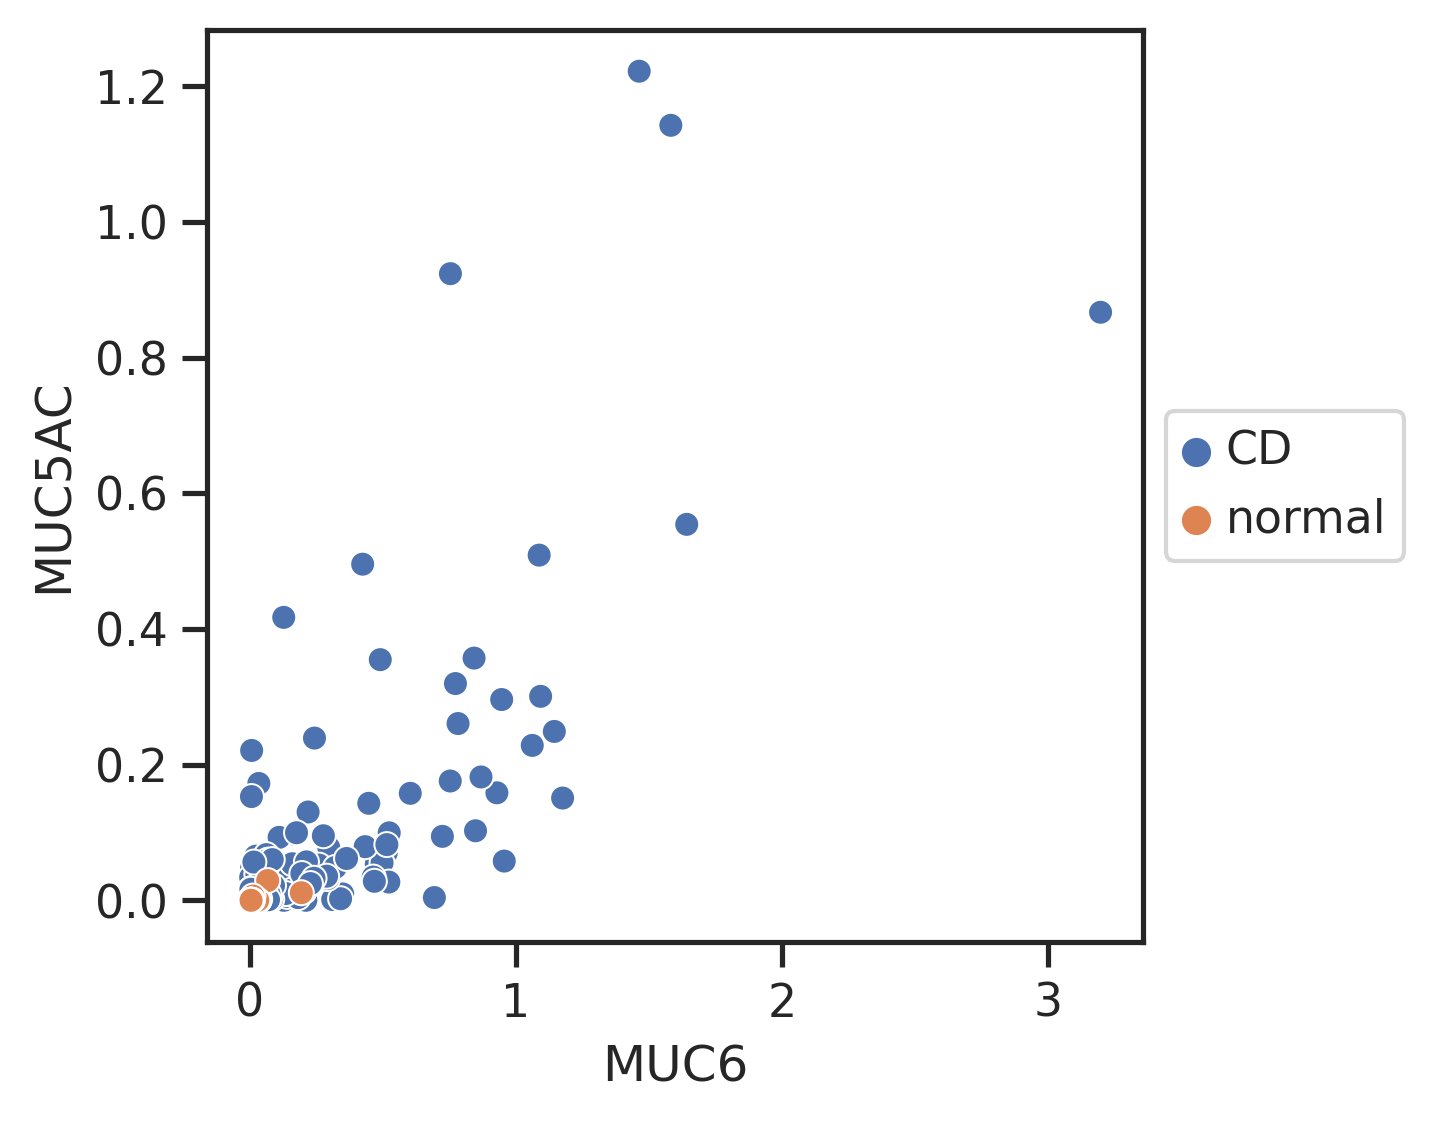

In [54]:
g = sns.scatterplot(data=new2, x="MUC6", y="MUC5AC", hue="disease")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [56]:
new2["disease"].value_counts()

CD        254
normal     50
Name: disease, dtype: int64

In [57]:
new2["MUC6"].groupby(new2["disease"]).describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
CD,254.0,0.156748,0.348814,0.00000,0.005215,0.013134,0.105453,3.198685
normal,50.0,0.013863,0.028283,0.00169,0.004622,0.007112,0.010705,0.194164


In [59]:
0.013863 + 0.028283*2

0.07042899999999999

In [60]:
new2.loc[new2['MUC6'] > 0.07042899999999999, 'disease'] = new2["disease"]+'_MUC6_high'

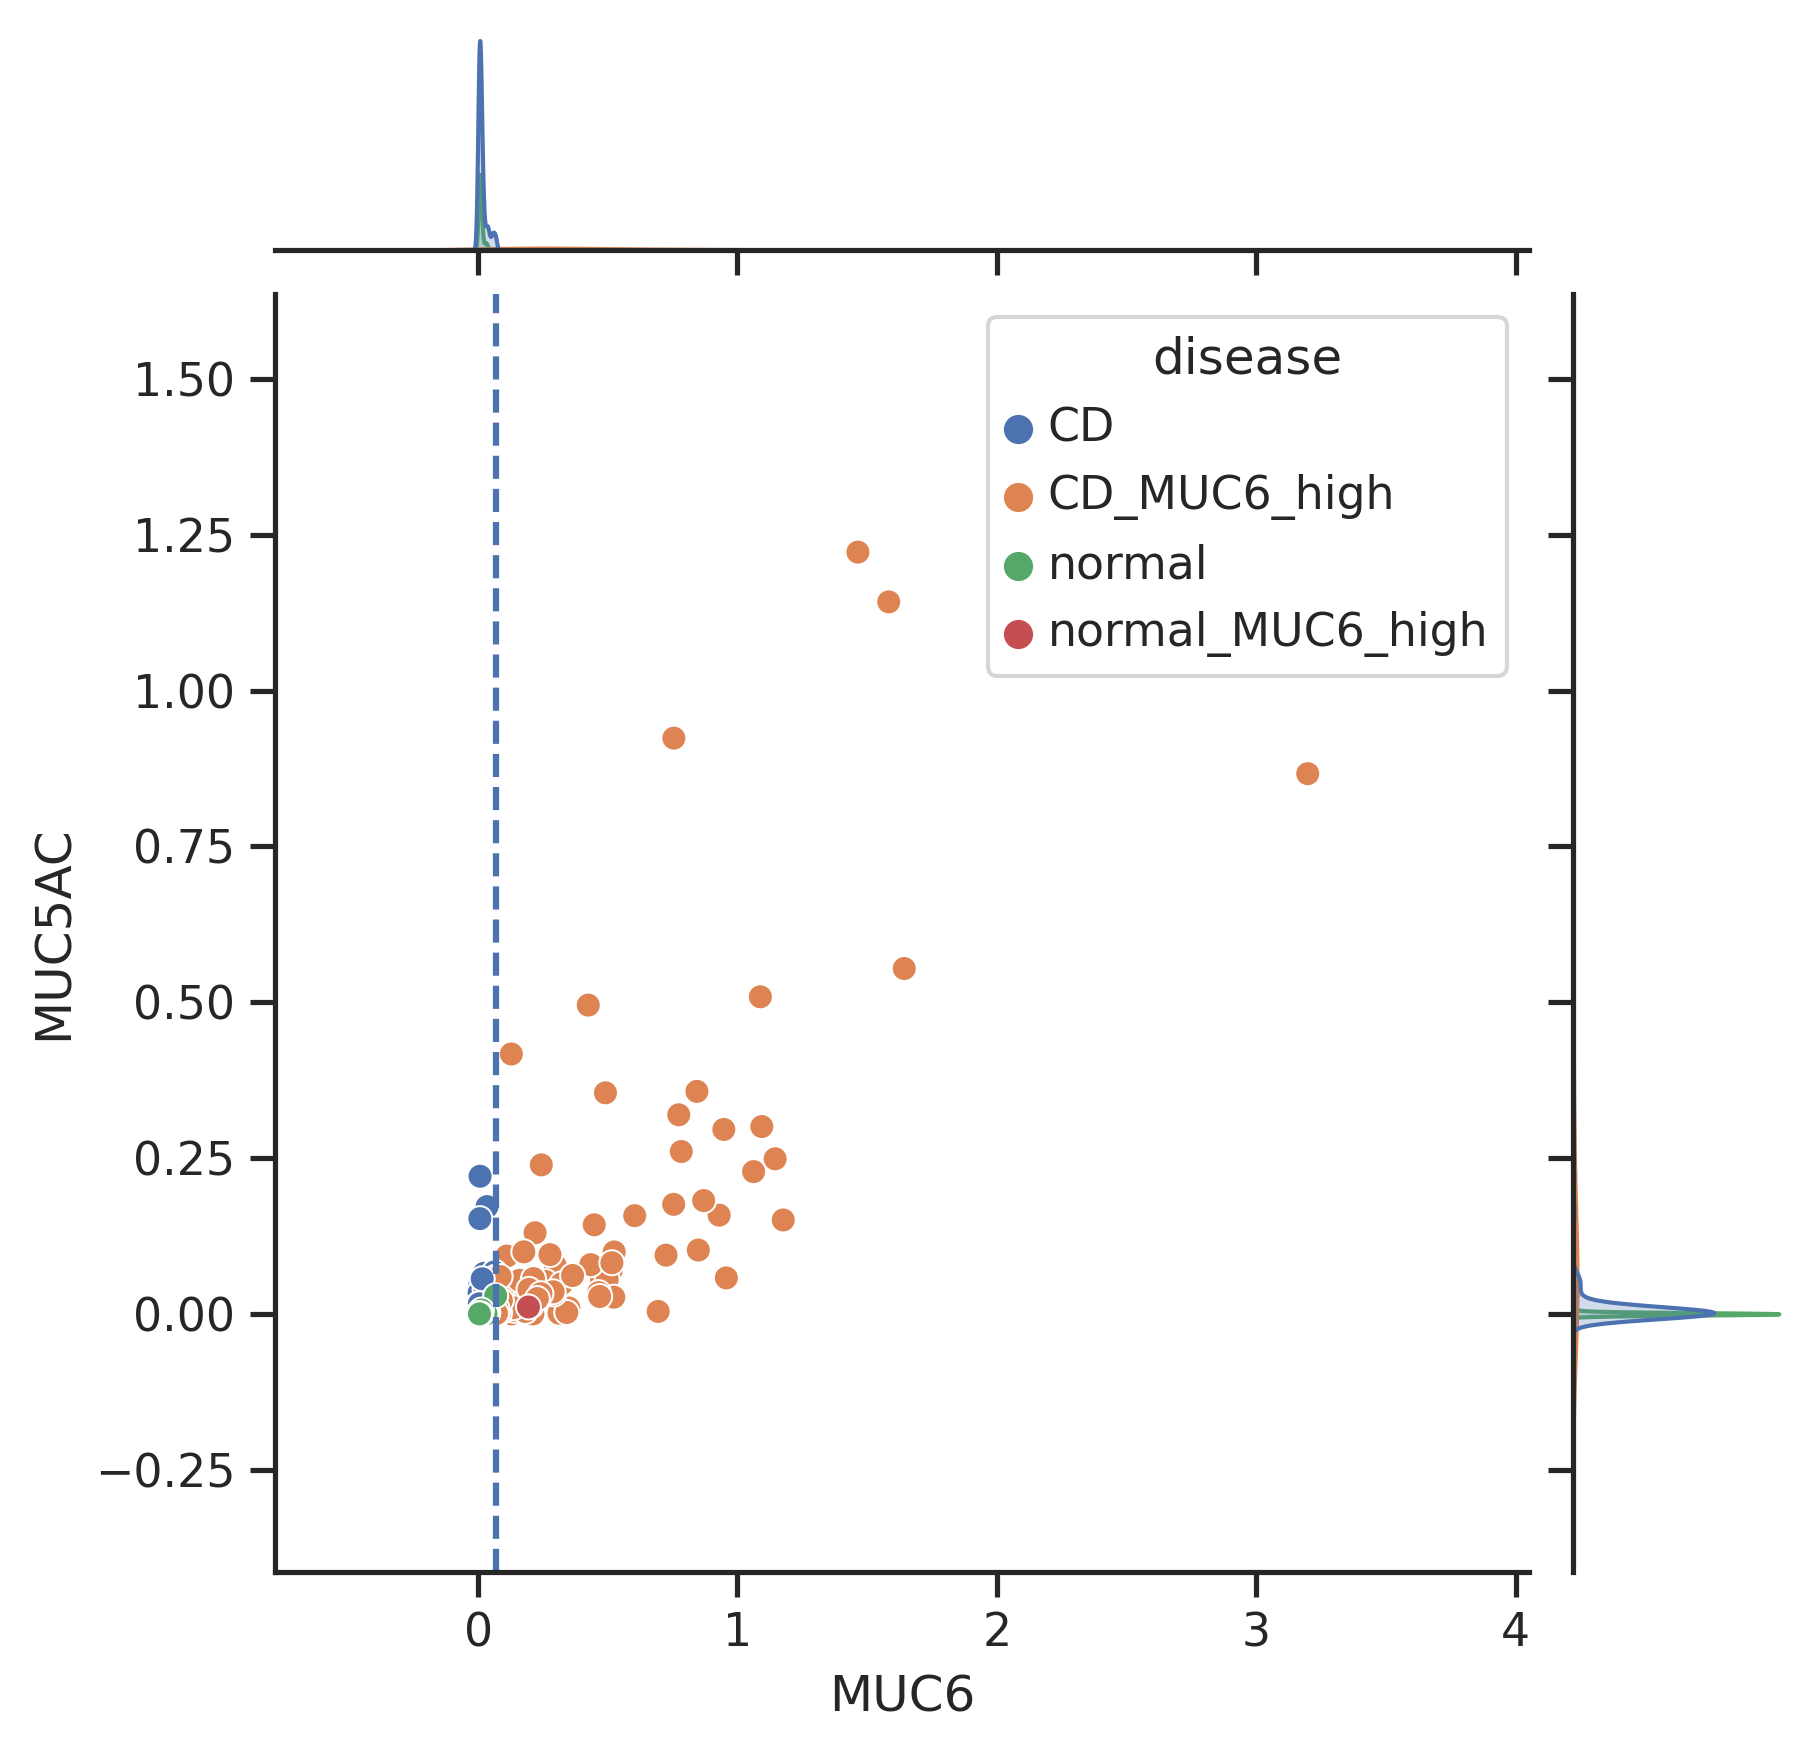

In [61]:
abc = sns.jointplot(data=new2, x="MUC6", y="MUC5AC", hue="disease")

abc.ax_joint.axvline(x=0.07042899999999999,linestyle='--')
#abc.ax_joint.set_xscale('log')
#abc.ax_joint.set_yscale('log')

In [62]:
new2["MUC6"].groupby(new2["disease"]).describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
CD,181.0,0.014308,0.016689,0.000000,0.003857,0.007599,0.015035,0.067969
CD_MUC6_high,73.0,0.509923,0.499371,0.070488,0.176158,0.341718,0.753986,3.198685
normal,49.0,0.010184,0.011203,0.001690,0.004514,0.007030,0.010696,0.067749
normal_MUC6_high,1.0,0.194164,NaN,0.194164,0.194164,0.194164,0.194164,0.194164


In [63]:
new2["disease"].value_counts()

CD                  181
CD_MUC6_high         73
normal               49
normal_MUC6_high      1
Name: disease, dtype: int64

In [64]:
new2 = new2[~new2["disease"].isin([ 'normal',])]

In [65]:
new2["disease"].unique()

array(['CD', 'CD_MUC6_high', 'normal_MUC6_high'], dtype=object)

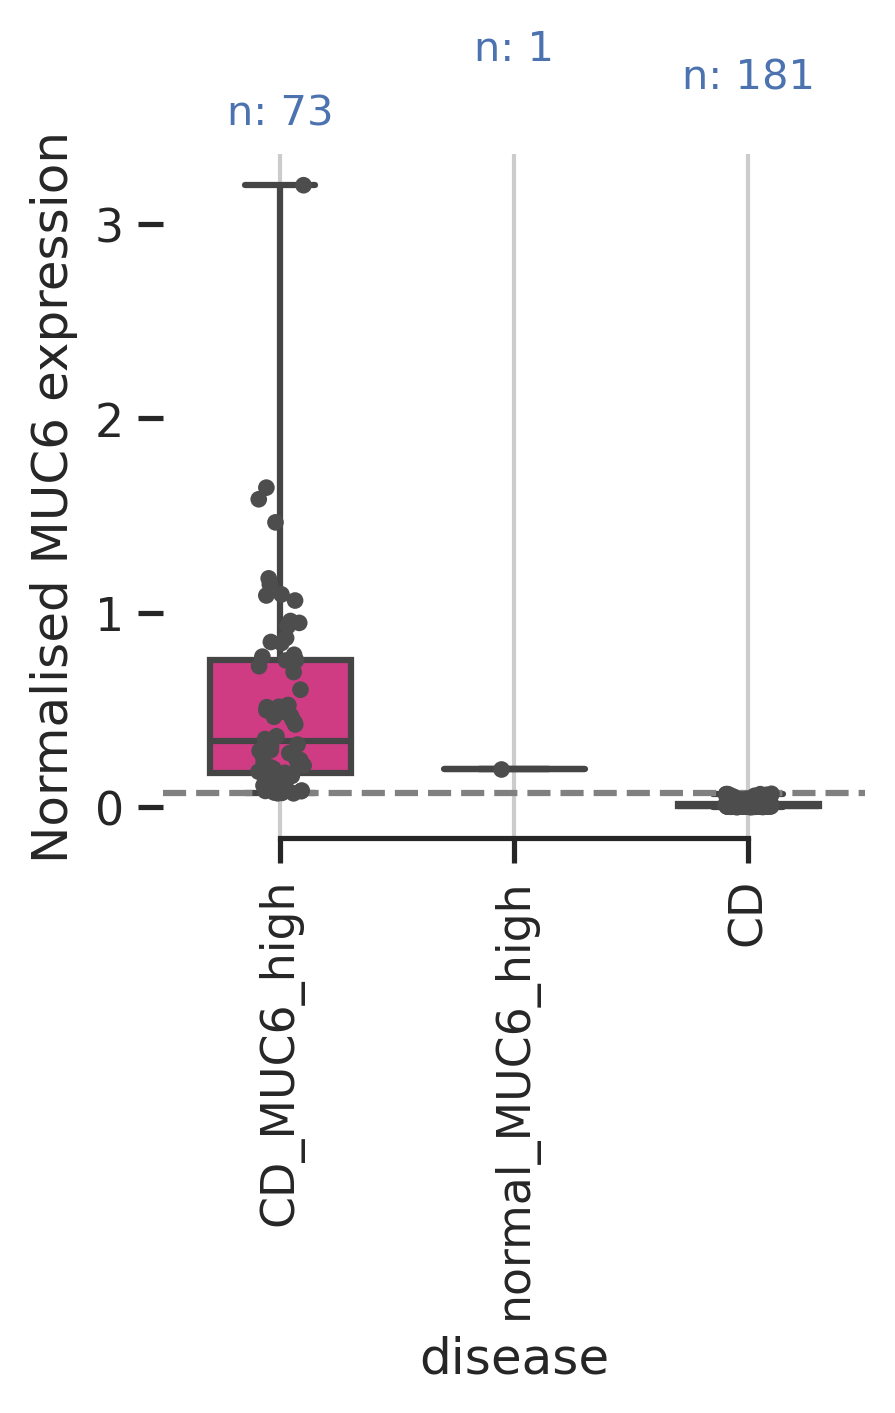

In [66]:
sns.set_theme(style="ticks") 
plt.figure(figsize=(3,3))
ax = sns.boxplot(x="disease", y="MUC6", data=new2, order = [ 'CD_MUC6_high', 'normal_MUC6_high','CD',],
                 whis=[0, 100], width=.6,palette=['#e92384', '#8934B1','#ADD3DD', '#e92384', '#8934B1','#ADD3DD'])

# Add in points to show each observation
sns.stripplot(x="disease", y="MUC6", data=new2,order = [ 'CD_MUC6_high', 'normal_MUC6_high', 'CD',],
              size=4, color=".3", linewidth=0)


# Calculate number of obs per group & median to position labels
medians = new2.groupby(['disease'])['MUC6'].median().values
nobs = new2['disease'].value_counts()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
nobs = [ 'n: 73', 'n: 1','n: 181']
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 3.5,
            nobs[tick],
            horizontalalignment='center',
            size='small',
            color='b',
            weight='regular')

ax.xaxis.grid(True)
ax.axhline(0.07042899999999999, color="grey", ls="--")
plt.xticks(rotation=90)
ax.set(ylabel="Normalised MUC6 expression")
sns.despine(trim=True, left=True)
plt.savefig("/mnt/nfs/re5/E_CEOD_101794_bulk.pdf", bbox_inches='tight') 
plt.show()

In [24]:
#third dataset E_MTAB_5464

In [25]:
df_MTAB = pd.read_csv("/mnt/farm/rl20/Gut/E_MTAB_5464_all_gene_exp.csv", index_col="Unnamed: 0")

In [26]:
df_MTAB["sample_ID"] = df_MTAB.index

In [27]:
df_MTAB["location"].unique()

array(['ascending_colon', 'sigmoid_colon', 'terminal_ileum'], dtype=object)

In [28]:
df_MTAB = df_MTAB[df_MTAB["location"].isin(["terminal_ileum"])]

In [29]:
df_MTAB.iloc[:,-3:]

,sample_type,location,sample_ID
ERR2270991,CD,terminal_ileum,ERR2270991
ERR2270992,CD,terminal_ileum,ERR2270992
ERR2270993,CD,terminal_ileum,ERR2270993
ERR2270994,CD,terminal_ileum,ERR2270994
ERR2270995,CD,terminal_ileum,ERR2270995
ERR2270996,CD,terminal_ileum,ERR2270996
ERR2270997,CD,terminal_ileum,ERR2270997
ERR2270998,normal,terminal_ileum,ERR2270998
ERR2270999,normal,terminal_ileum,ERR2270999
ERR2271000,normal,terminal_ileum,ERR2271000


In [30]:
adata2 = sc.AnnData(df_MTAB.iloc[:,:39331])
adata2.obs = df_MTAB.iloc[:,-3:]
adata2.obs_names = adata2.obs["sample_ID"]
adata2.raw = adata2.copy()
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

normalizing counts per cell
    finished (0:00:00)


/tmp/ipykernel_6140/2598377396.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata2 = sc.AnnData(df_MTAB.iloc[:,:39331])


In [31]:
#adata2.write("/mnt/01_Translation_relevant/bulk_objects/E_MTAB_5464_bulk_IBD.h5ad")

In [32]:
df_MTAB["MUC6"].groupby(df_MTAB["sample_type"]).describe()

,count,mean,std,min,25%,50%,75%,max
sample_type,,,,,,,,
CD,10.0,199.000000,465.134150,2.0,6.5,13.5,39.0,1476.0
UC,11.0,8.090909,5.990902,0.0,4.0,6.0,11.5,21.0
normal,11.0,6.636364,3.668044,1.0,3.5,9.0,9.5,11.0


In [33]:
new2 = pd.DataFrame(adata2.X, index=adata2.obs_names, columns=adata2.var_names)
new2["disease"] = adata2.obs.sample_type
new2["location"] = adata2.obs.location
new2["sample_ID"] = adata2.obs.sample_ID

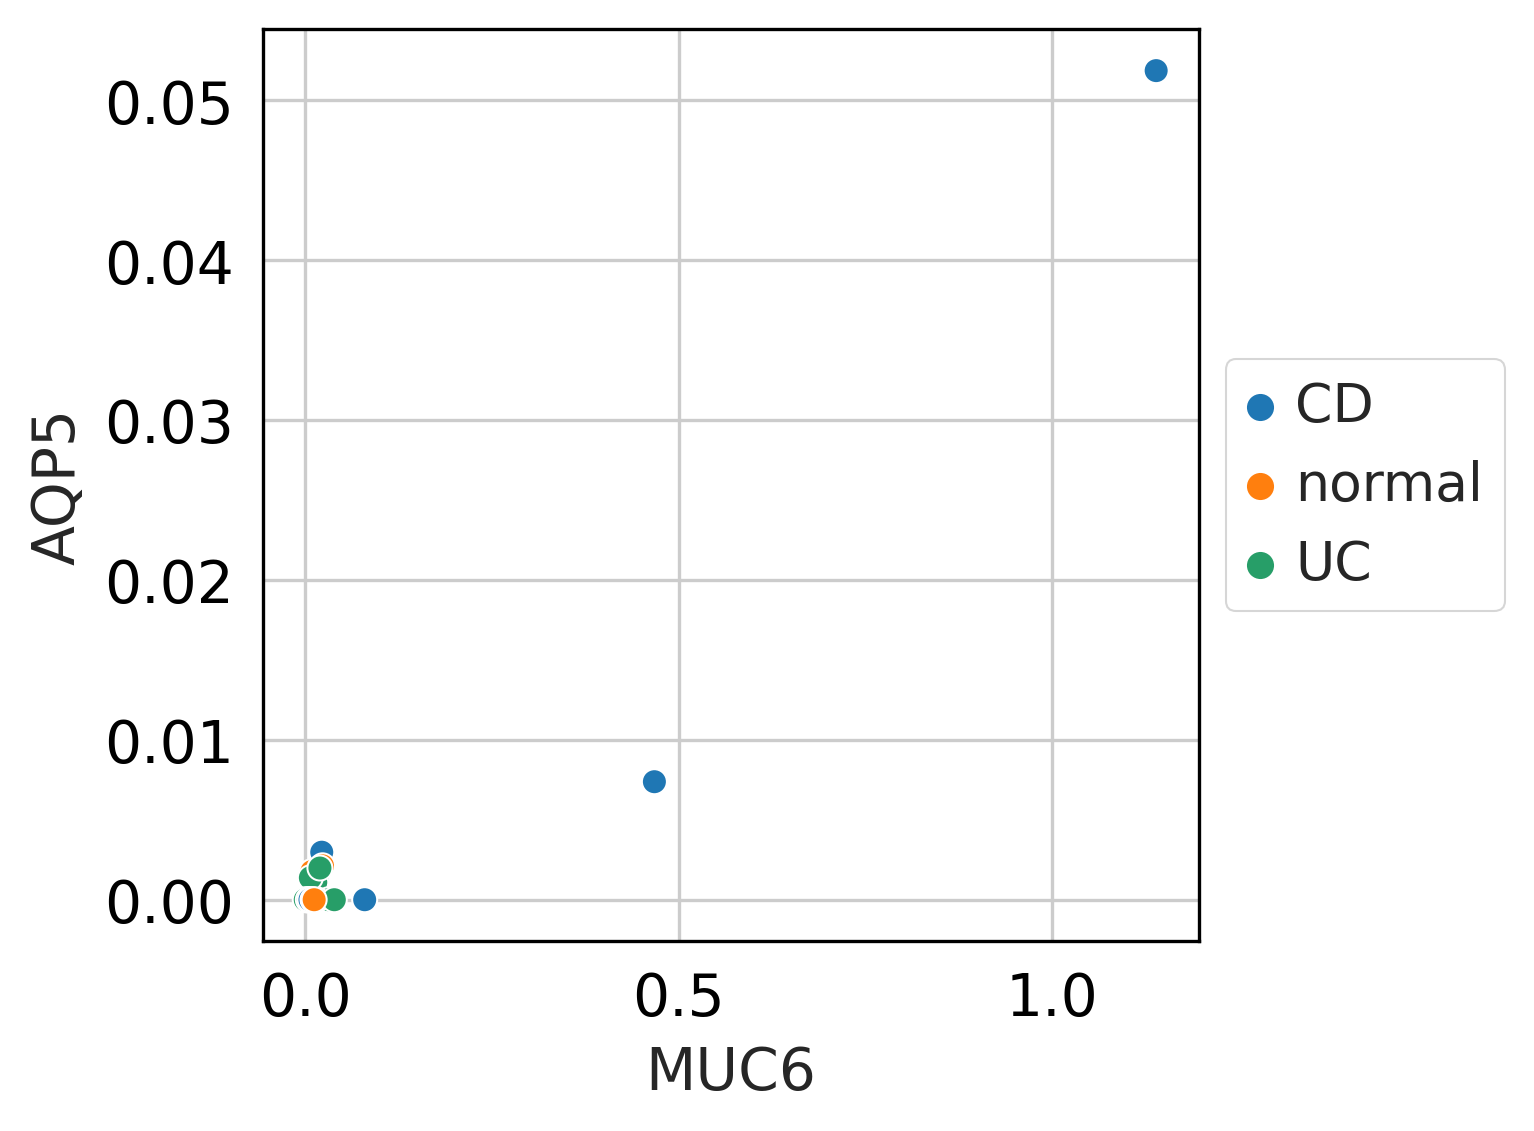

In [34]:
g = sns.scatterplot(data=new2, x="MUC6", y="AQP5", hue="disease")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

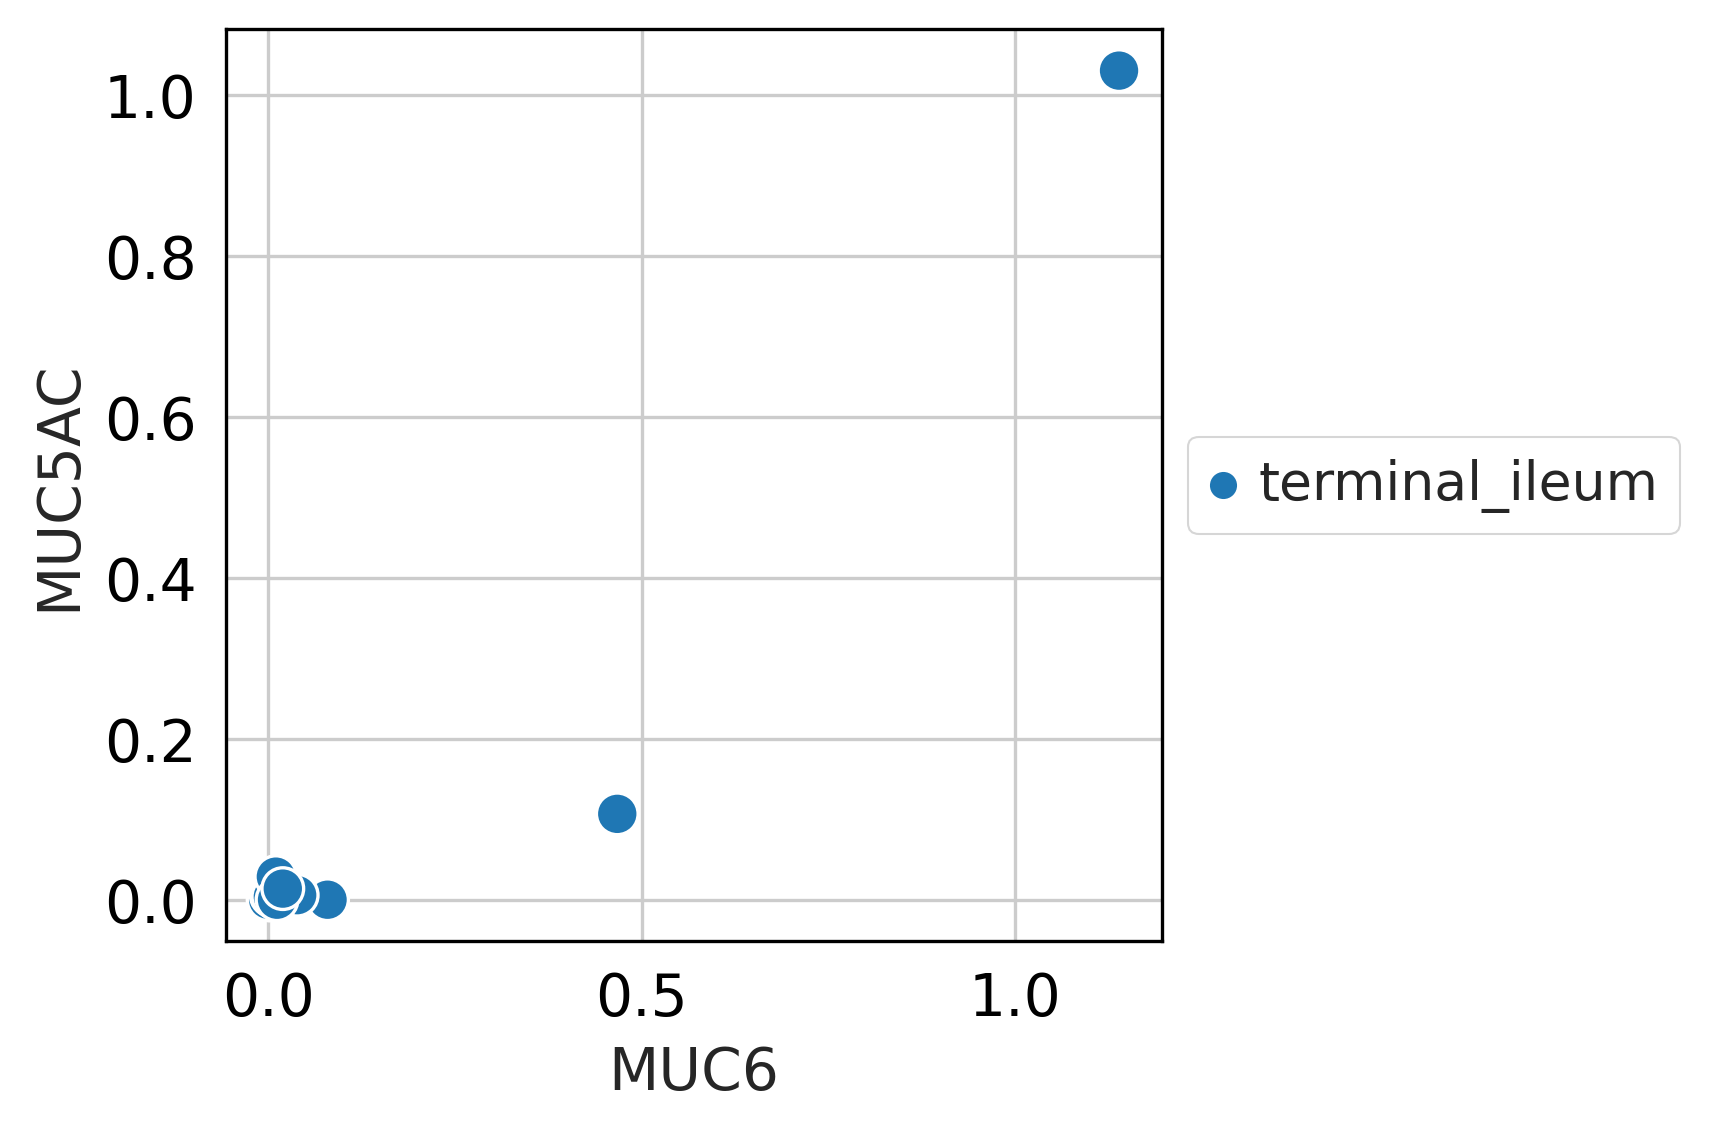

In [35]:
g = sns.scatterplot(data=new2, x="MUC6", y="MUC5AC", hue="location", s=100)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

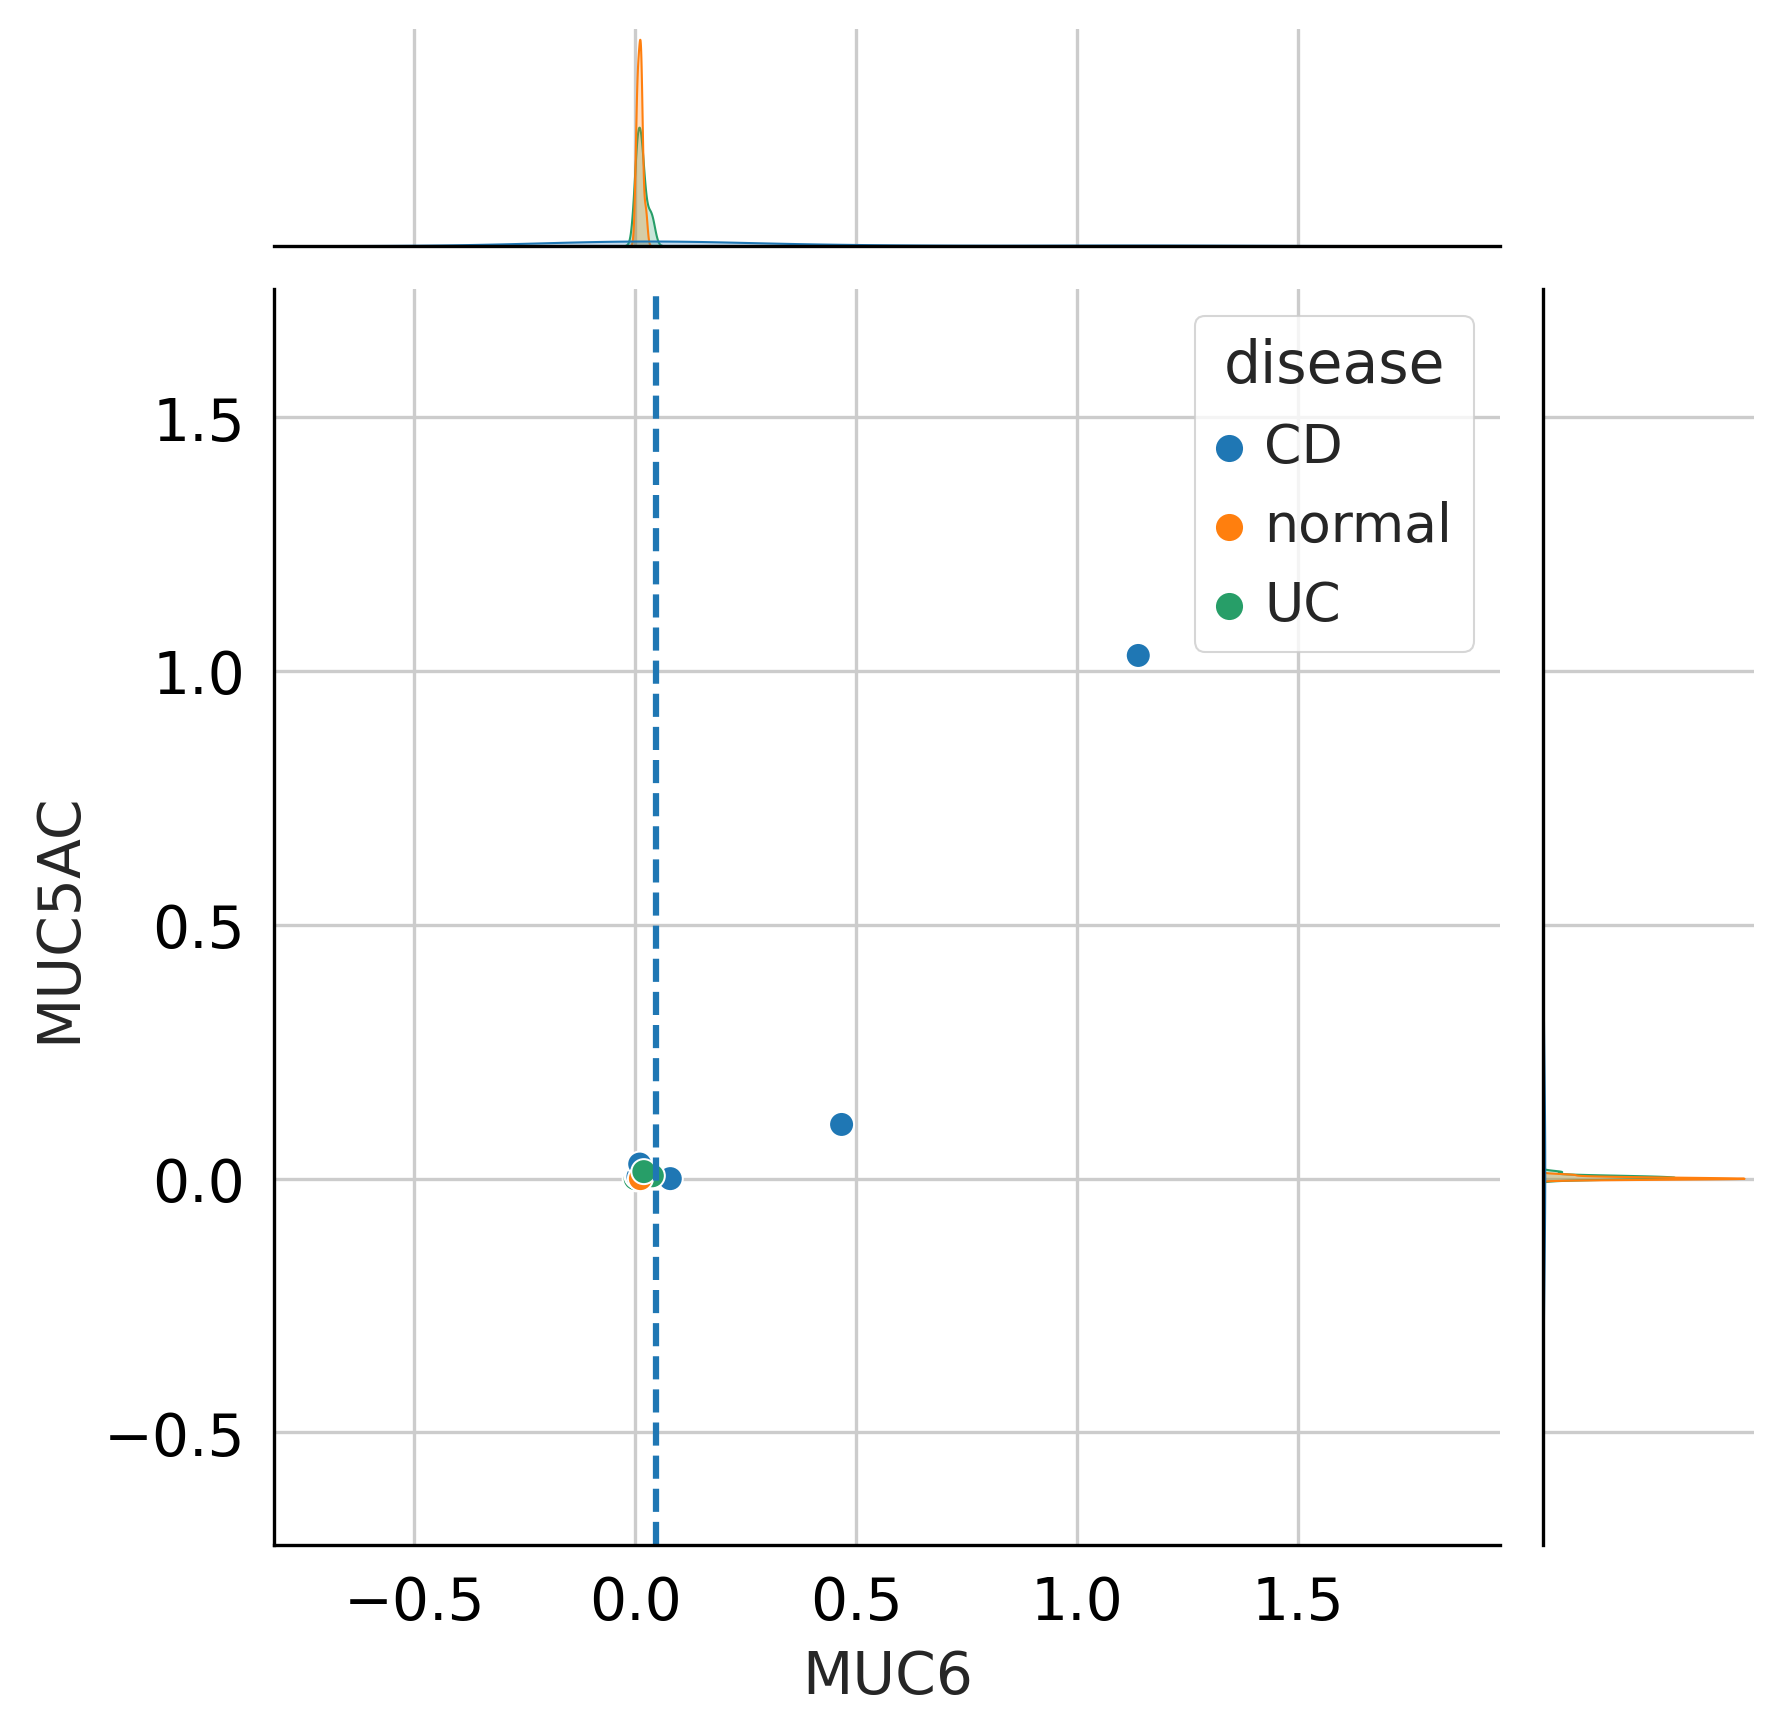

In [36]:
abc = sns.jointplot(data=new2, x="MUC6", y="MUC5AC", hue="disease")
abc.ax_joint.axvline(x= 0.046984,linestyle='--')
#abc.ax_joint.set_xscale('log')
#abc.ax_joint.set_yscale('log')

In [37]:
new2["MUC6"].groupby(new2["disease"]).describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
CD,10.0,0.177243,0.366494,0.003408,0.011191,0.015427,0.065164,1.138869
UC,11.0,0.014005,0.012013,0.000000,0.005442,0.013077,0.017474,0.038883
normal,11.0,0.009890,0.006133,0.001413,0.004677,0.010057,0.012976,0.023087


In [38]:
#take any value higher than 1-2 SDs from the mean expression in controls
0.009890 + 0.006133*2

0.022156000000000002

In [39]:
new2.loc[new2['MUC6'] > 0.022156, 'disease'] = new2["disease"]+'_MUC6_high'

In [40]:
new2["MUC6"].groupby(new2["disease"]).describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
CD,7.0,0.012393,0.006270,0.003408,0.008331,0.013755,0.015427,0.022072
CD_MUC6_high,3.0,0.561894,0.535970,0.079528,0.273407,0.467286,0.803077,1.138869
UC,9.0,0.009324,0.006420,0.000000,0.004801,0.006850,0.014047,0.019639
UC_MUC6_high,2.0,0.035065,0.005400,0.031247,0.033156,0.035065,0.036974,0.038883
normal,10.0,0.008571,0.004529,0.001413,0.004585,0.009420,0.012306,0.014088
normal_MUC6_high,1.0,0.023087,NaN,0.023087,0.023087,0.023087,0.023087,0.023087


In [41]:
new2["disease"].value_counts()

normal              10
UC                   9
CD                   7
CD_MUC6_high         3
UC_MUC6_high         2
normal_MUC6_high     1
Name: disease, dtype: int64

In [42]:
new2 = new2[~new2["disease"].isin([ 'normal', 'UC' , "UC_MUC6_high"])]

In [43]:
list(new2["disease"].unique())

['CD', 'CD_MUC6_high', 'normal_MUC6_high']

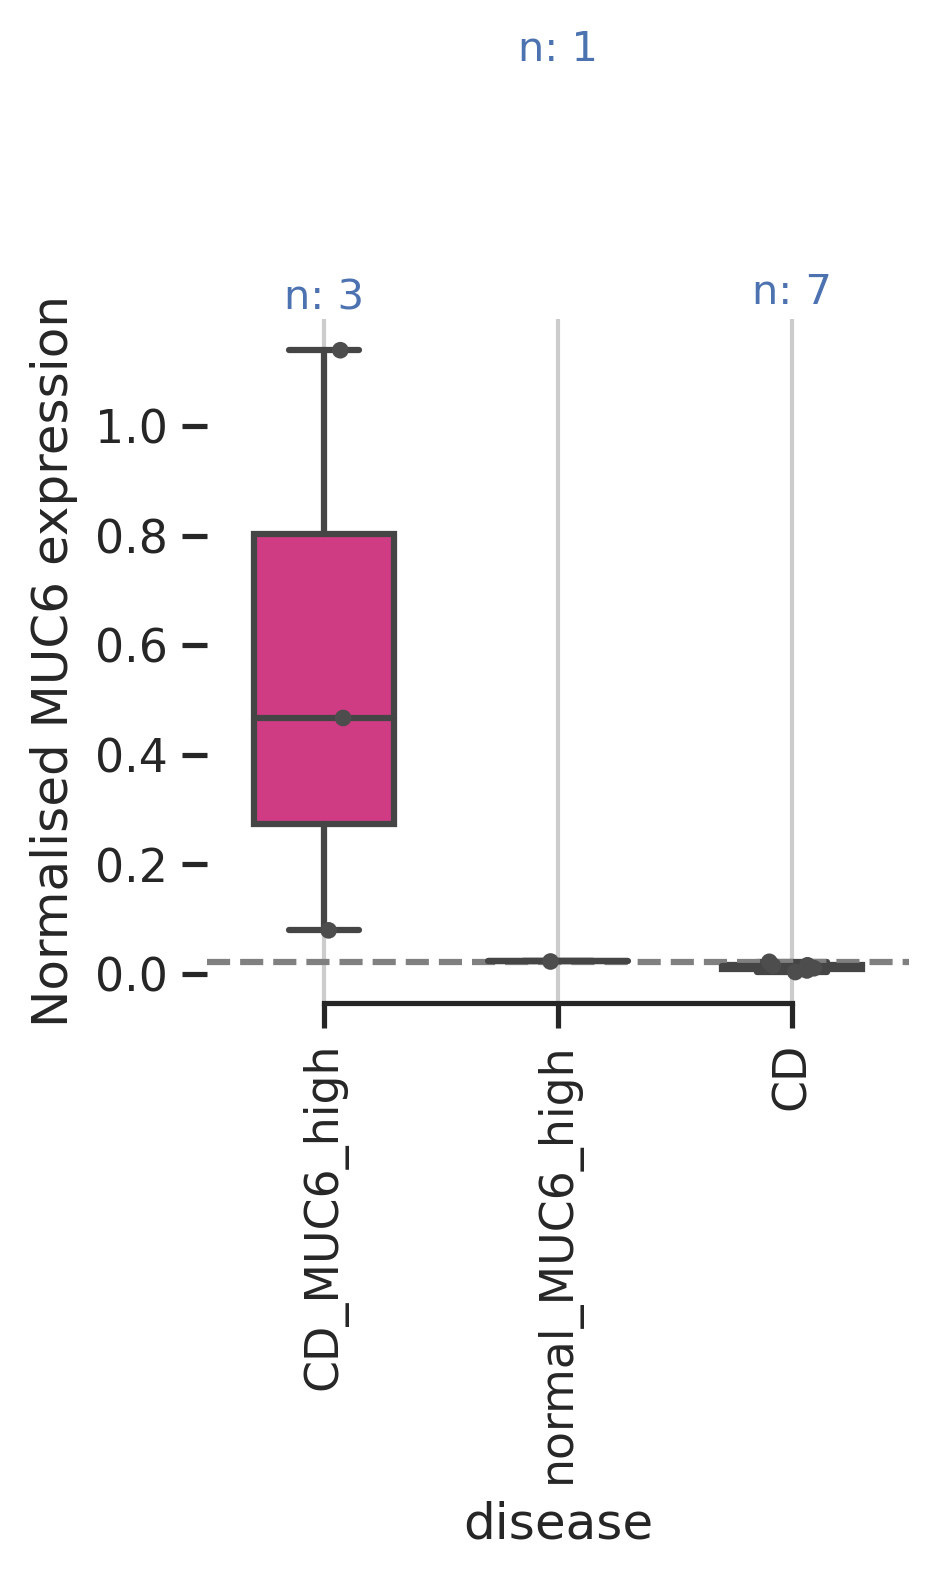

In [44]:
sns.set_theme(style="ticks") 
plt.figure(figsize=(3,3))
ax = sns.boxplot(x="disease", y="MUC6", data=new2, order = ['CD_MUC6_high', 'normal_MUC6_high',  'CD', ],
                 whis=[0, 100], width=.6,palette=['#e92384', '#8934B1','#ADD3DD', '#e92384', '#8934B1','#ADD3DD'])

# Add in points to show each observation
sns.stripplot(x="disease", y="MUC6", data=new2,order = ['CD_MUC6_high', 'normal_MUC6_high',  'CD',],
              size=4, color=".3", linewidth=0)


# Calculate number of obs per group & median to position labels
medians = new2.groupby(['disease'])['MUC6'].median().values
nobs = new2['disease'].value_counts()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
nobs

nobs = [ 'n: 3', 'n: 1', 'n: 7',]


# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 1.2,
            nobs[tick],
            horizontalalignment='center',
            size='small',
            color='b',
            weight='regular')

ax.xaxis.grid(True)
ax.axhline(0.0221560, color="grey", ls="--")
plt.xticks(rotation=90)
ax.set(ylabel="Normalised MUC6 expression")
sns.despine(trim=True, left=True)
plt.savefig("/mnt/nfs/re5/E_MTAB_5464_bulk.pdf", bbox_inches='tight') 
plt.show()
